In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')

/var/folders/09/9bnyqv215k92q_njqzl8zzbm0000gn/T/ipykernel_58416/851267235.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')


In [70]:
# 시군명, 업종명(종목명), 업종코드, 휴폐업상태, 휴페업상태 코드, 폐업일자 남기고 다른 column 삭제
# 시군명 -> 각 시마다 어떤 업종이 아직 폐업, 휴업중이 아닌지, 분석 할 수 있음1
# 업종명, 업종 코드 -> 업종 종류를 분류 할 수 있음
# 휴폐업상태 -> 어떤 업종이 휴폐업 상태인지 분류 가능. 그리고 비슷한 업종끼리 묶어서 분류 가능
# 휴폐업 상태 코드는 뭔지 잘 모름. 찾아보니 계속 사업자 1, 휴업자 2, 폐업자 3 그렇다면 휴폐업 상태를 버려도? 코드만 보고 분석 가능. , 정상영업하는 곳은 0으로 처리
# 폐업 일자 -> 폐업일자를 월 별로 묶어 어떤 달에 어떤 업종이 가장 많이 폐업을 했는지 분석 가능
# - 아직 분석을 안해봐서 모르지만 폐업한 업종을 분류해서 어떤 업종은 지역화폐를 사용해도 폐업할 가능성이 높다는 결론을 도출해낼 수도 있음
# - 휴폐업상태를 알 수 있다는게 유의미한 결과가 될 수도??
#  현재 시군별로 있는 지역화폐 가맹점을 위의 연령과 성별, 신규가입자수 등과 비교하면서 어떤 시군에 어떤 지역화폐 가맹점을 늘리면 경제에 유의미한 변화가 생길지 등을 분석할 수 있음
# 업종명이 많은 순서대로 나열해서, 시/군 명과 업종명의 연관성을 분석
# 22년데이터에서 새로 추가된 4천개의 데이터만 뽑아 최근 2년간 어떤 업종이 유행했는지도 분석 가능

In [19]:
# 한글 글꼴 설정 (macOS에서 사용 가능한 한글 글꼴)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS에서 'AppleGothic' 글꼴을 사용합니다
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [20]:
# 데이터 복사본 만들기
df1 = df.copy()

In [21]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(418750, 15)


In [22]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군명       418750 non-null  object 
 1   상호명       418750 non-null  object 
 2   업종명(종목명)  418750 non-null  object 
 3   소재지도로명주소  401510 non-null  object 
 4   소재지지번주소   418750 non-null  object 
 5   우편번호      414011 non-null  float64
 6   위도        410910 non-null  float64
 7   경도        410910 non-null  float64
 8   사업자등록번호   418750 non-null  object 
 9   업종코드      418750 non-null  int64  
 10  가맹점번호     402898 non-null  object 
 11  휴폐업상태     105882 non-null  object 
 12  휴폐업상태코드   105882 non-null  float64
 13  폐업일자      15191 non-null   object 
 14  데이터기준일자   418750 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 47.9+ MB
None


In [23]:
# 필요한 변수명 : 시군명, 상호명, 업종명(종목명), 업종코드, 휴폐업상태, 폐업일자, 데이터기준일자
df1 = df1.drop(['소재지도로명주소','소재지지번주소','우편번호', '위도', '경도', '사업자등록번호', '가맹점번호', '휴폐업상태코드'], axis = 1)
df1

시군명          상호명    업종명(종목명)  업종코드 휴폐업상태 폐업일자   데이터기준일자
0       고양시      까망노래연습장         노래방  8402   NaN  NaN  20240331
1       고양시     일산좋은치과의원          치과  4201   NaN  NaN  20240331
2       고양시          잉크존     문구,사무용품  8102   NaN  NaN  20240331
3       고양시         참좋은집  오양.보육.복지시설  7301   NaN  NaN  20240331
4       고양시      (주)팩토리빈       커피전문점  2502   NaN  NaN  20240331
...     ...          ...         ...   ...   ...  ...       ...
418745  화성시      킹(KING)     차량부품.용품  6501   NaN  NaN  20240331
418746  화성시  아리가또맘마 중동탄점       일식전문점  2303   NaN  NaN  20240331
418747  화성시       아이티씨영어  기타교육.교습.학원  7213   NaN  NaN  20240331
418748  화성시        다함 목재      기타건축자재  3403   NaN  NaN  20240331
418749  화성시         전주명가       일반음식점  2301   NaN  NaN  20240331

[418750 rows x 7 columns]

In [24]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   시군명       418750 non-null  object
 1   상호명       418750 non-null  object
 2   업종명(종목명)  418750 non-null  object
 3   업종코드      418750 non-null  int64 
 4   휴폐업상태     105882 non-null  object
 5   폐업일자      15191 non-null   object
 6   데이터기준일자   418750 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 22.4+ MB
None


- 휴폐업상태에 상당한 결측치가 있음
- 폐업일자에도 상당한 결측치가 있으나, 폐업일자는 폐업에만 해당되기 때문에 다른 전처리 필요 x, 나중에 각 월별로 어떤 달에 가장 많은 업종이 폐업했는지 알아볼 때 써보자
- 사실상 데이터기준일자도 필요 없어보임. drop 해야함.


In [25]:
# 데이터의 결측치 확인
print(('데이터1의 결측치 : '))
df1.isnull().sum()

데이터1의 결측치 : 


시군명              0
상호명              0
업종명(종목명)         0
업종코드             0
휴폐업상태       312868
폐업일자        403559
데이터기준일자          0
dtype: int64

### 시군명 전처리

In [26]:
print(df1['시군명'].unique(), '\n')
print(df1['시군명'].describe())

['고양시' '가평군' '부천시' '동두천시' '과천시' '광명시' '광주시' '구리시' '군포시' '김포시' '남양주시' '성남시'
 '시흥시' '안산시' '이천시' '용인시' '파주시' '평택시' '화성시' '수원시' '안성시' '안양시' '양주시' '양평군'
 '여주시' '연천군' '오산시' '의왕시' '의정부시' '포천시' '하남시'] 

count     418750
unique        31
top          수원시
freq       37487
Name: 시군명, dtype: object


### 업종명(종목명) 전처리

In [27]:
#업종명(종목명)을 '업종명'으로 바꾸기
df1 = df1.rename(columns={'업종명(종목명)':'업종명'})

In [28]:
print(df1['업종명'].describe(), '\n')
print(df1['업종명'].unique())

count     418750
unique       221
top        일반음식점
freq      106029
Name: 업종명, dtype: object 

['노래방' '치과' '문구,사무용품' '오양.보육.복지시설' '커피전문점' '화장품' '세탁업' '기타교육.교습.학원'
 '기타취미.레저.스포츠' '피부.체형미관리' '기타건축자재' '편의점' '축산물,정육점' '입시학원,보습학원' '전문스포츠용품점'
 '미용실(두발전문)' '일반음식점' '기타식음료품' '예체능계열학원' '약국' '기타음식점' '건강보조식품' '일식전문점'
 '자동차정비' '정형외과' '광고기획.대행업' '일반주점' '차량부품.용품' '기타' '무수도장 등(학원)' '한의원'
 '식음료(기타)' '서적(출판)' '당구장' '가구판매점' '헬스클럽' '조명기구.전기' '이비인후과' '기타잡화'
 '실내장식(인테리어)' '자전거' '통신.방문판매' '화원.화초' '기타오락.휴식시설' '기타수리.수선전문' '기타서비스'
 '치킨전문점' '기타약품.의료기기' '서양식전문점' '침구및수예품' '기타가정.주방용품' '중고품판매점' '통신기기'
 '기타레저,스포츠용품' '산부인과' '중식전문점' '애완동물,용품(수족관)' '기타전문서비스' '미용재료' '농산물,청과물'
 '세무전문서비스' '일반의류' '기타종합소매점' '주류전문점' '한약방' '안경.광학제품' '외국어학원' '세차장' '악기판매점'
 '기타사무용기기' '동물병원' '내과' '자동차운전학원' '내의류' '슈퍼마켓.마트' '완구' '피부과' '컴퓨터및소프트웨어'
 '판촉물.인쇄.복사' '제과.제빵' '커튼.카펫.수건' '사진관.현상소' '수산물,건어물' '차량임대 (렌터카)' '패스트푸드점'
 '기타상품판매점' '인터넷상거래' '교육및교구' '정수기.비데' '아동.유아복' '기술.직업훈력학원' '민예품.공예품'
 '아이스크림전문점' '타이어판매점' '성형외과' '가전제품' '골프연습장' '스포츠용품점' '소아과' '양복점.

In [29]:
# 동일 업종 묶기(AI 기반 정리)

# 음식점: 일반음식점, 기타음식점
df1['업종명'] = df1['업종명'].replace(['일반음식점', '기타음식점'], '음식점')

# 한의원: 한방병원, 한의원
df1['업종명'] = df1['업종명'].replace(['한의원', '한방병원', '한약방'], '한의원')

# 커피 및 베이커리: 커피전문점, 카페/베이커리, 제과.제빵
df1['업종명'] = df1['업종명'].replace(['커피전문점', '카페/베이커리', '제과.제빵'], '커피 및 베이커리')

#교육 및 학습 : 기타교육.교습.학원, 입시학원, 보습학원, 예체능계역학원, 기술.직업훈력학원, 외국어학원, 교육서비스업,무수도장 등(학원)
df1['업종명'] = df1['업종명'].replace(['기타교육.교습.학원', '입시학원', '보십학원', '예체능계열학원', '기술.직업훈력학원', '외국어학원', '교육서비스업','무수도장 등(학원)'], '교육 및 학습')

# 의류 및 잡화 : 일반의류, 내의류, 의류관련(기타), 의류/잡화/안경, 기타잡화, 기타종합소매점
df1['업종명'] = df1['업종명'].replace(['일반의류', '내의류', '의류관련(기타)', '의류/잡화/안경', '기타잡화', '기타종합소매점'], '의류 및 잡화')

# 골프시설: 골프연습장, 골프장
df1['업종명'] = df1['업종명'].replace(['골프연습장', '골프장'], '골프시설')

# 스포츠용품점 : 전문스포츠용품점, ‘기타레저,스포츠용품점’, 스포츠용품점
df1['업종명'] = df1['업종명'].replace(['전문스포츠용품점', '기타레저,스포츠용품점', '스포츠용품점'], '스포츠용품점')

# 자동차 관련 업종 : 자동차정비, 차량부품.용품, 타이어판매점
df1['업종명'] = df1['업종명'].replace(['자동차정비', '차량부품.용품', '타이어판매점'], '자동차 관련 업종')

# 자동차 및 자전거 판매 : 자동차(중고차), 자동차(국산신차), 자동차(수입신차), 자동차/자전거, 자전거
df1['업종명'] = df1['업종명'].replace(['자동차(중고차)', '자동차(국산신차)', '자동차(수입신차)','자동차/자전거', '자전거'], '자동차 및 자전거 판매')

# 주점 : 기타주점, 유흥주점, 단란주점, 일반주점
df1['업종명'] = df1['업종명'].replace(['기타주점', '유흥주점', '단란주점', '일반주점'], '주점')

# 여행서비스 : 여행사, 여행지원서비스
df1['업종명'] = df1['업종명'].replace(['여행사', '여행지원서비스'], '여행서비스')

# 숙박업 : 호텔(특급), 호텔(특급외), 기타숙박업소, 레저용 숙박업소, 숙박업
df1['업종명'] = df1['업종명'].replace(['호텔(특급)', '호텔(특급외)', '기타숙박업소', '레저용 숙박업소', '숙박업'], '숙박업')

# 주유소 : 주유소, 주유소(LPG)
df1['업종명'] = df1['업종명'].replace(['주유소', '주유소(LPG)'], '주유소')

# 가전/통신 : 가전/통신, 가전제품, 기타전자제품
df1['업종명'] = df1['업종명'].replace(['가전/통신', '가전제품','기타전자제품'], '가전/통신')

# 식음료품 : 식음료(기타),기타식음료품
df1['업종명'] = df1['업종명'].replace(['식음료(기타)', '기타식음료품'], '식음료품')

# 도서/문화/공연/오락 :오락실/PC방, 영화.공연장, 도서/문화/공연/오락
df1['업종명'] = df1['업종명'].replace(['오락실/PC방', '도서/문화/공연/오락', '영화.공연장'], '도서/문화/공연/오락')

# 미용: 미용/뷰티/위생, 미용실(두발전문), 미용재료
df1['업종명'] = df1['업종명'].replace(['미용/뷰티/위생', '미용실(두발전문)', '미용재료'], '미용')

#산모/육아 : 산모/육아, 산후조리원
df1['업종명'] = df1['업종명'].replace(['산모/육아', '산후조리원'], '산모/육아')

#편의점/슈퍼/마트 : 편의점, 편의점/슈퍼/마트
df1['업종명'] = df1['업종명'].replace(['편의점', '편의점/슈퍼/마트'], '편의점/슈퍼/마트')

#피부 및 헬스 : 피부.체형미관리, 피부과, 헬스클럽
df1['업종명'] = df1['업종명'].replace(['피부.체형미관리', '피부과', '헬스클럽'], '피부 및 헬스')

In [30]:
df1['업종명'].describe()

count     418750
unique       178
top          음식점
freq      107156
Name: 업종명, dtype: object

# 시군별 상위 5개 업종명 확인 및 시각화 (원형, 막대)

In [31]:
# 시군명을 리스트로 저장
city_county_names = df1['시군명'].unique().tolist()

# 특정 시군명의 상위 10개 업종명을 계산하는 함수
def get_top_10_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    top_10_industry_count = industry_count.nlargest(5)
    return top_10_industry_count

In [32]:
import matplotlib.pyplot as plt

def plot_top_10_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_10_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(6, 4))
    plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 상위 5개 업종명 비율")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(6, 4))
    plt.bar(top_10_industries.index, top_10_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 상위 5개 업종명 개수")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [33]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

City/County: 고양시
음식점          5646
교육 및 학습      2597
미용           1667
커피 및 베이커리    1407
피부 및 헬스       971
Name: 업종명, dtype: int64


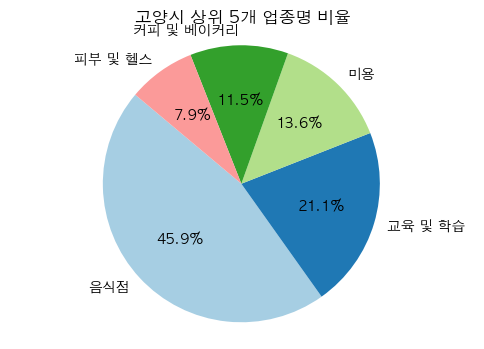

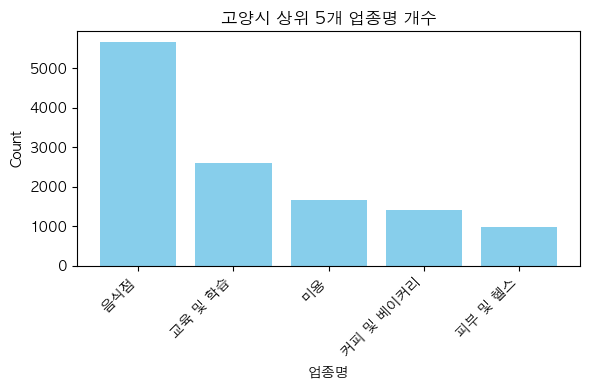

In [34]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_10_industries_by_city(index)

City/County: 가평군
음식점          1086
숙박업           233
식음료품          170
커피 및 베이커리     160
편의점/슈퍼/마트     150
Name: 업종명, dtype: int64


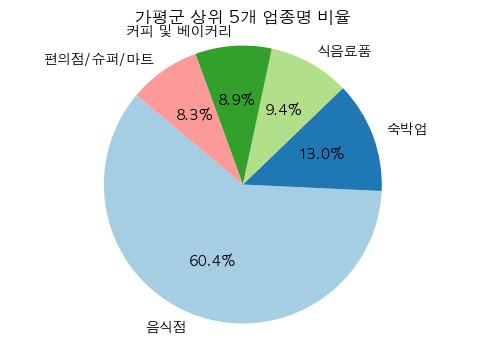

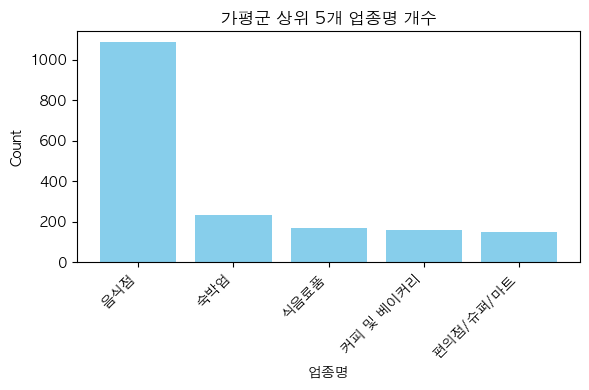

In [35]:
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 부천시
음식점          5343
교육 및 학습      1746
미용           1726
커피 및 베이커리    1240
피부 및 헬스       939
Name: 업종명, dtype: int64


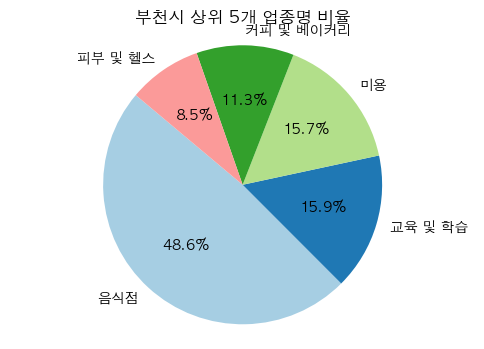

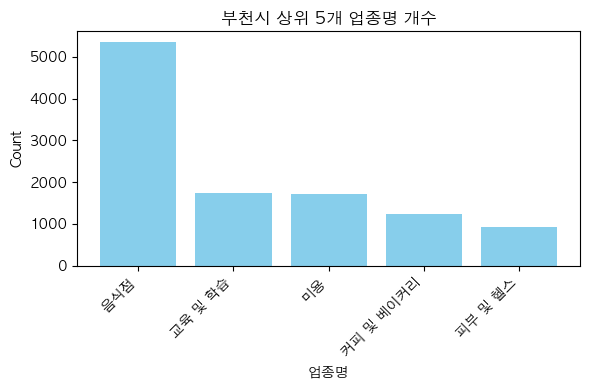

In [36]:
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 부천시
음식점          5343
교육 및 학습      1746
미용           1726
커피 및 베이커리    1240
피부 및 헬스       939
Name: 업종명, dtype: int64


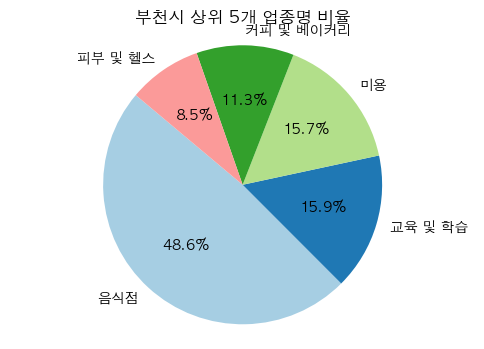

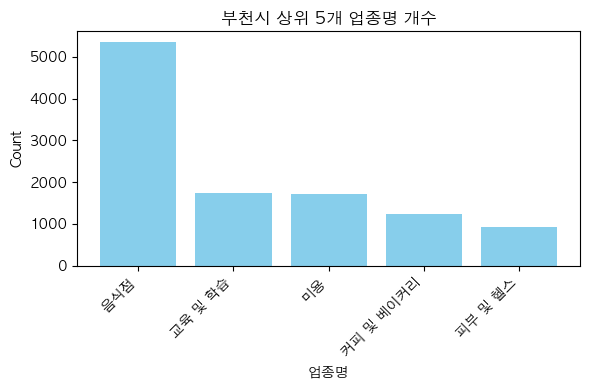

In [37]:
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 동두천시
음식점          846
미용           227
식음료품         143
의류 및 잡화      142
편의점/슈퍼/마트    134
Name: 업종명, dtype: int64


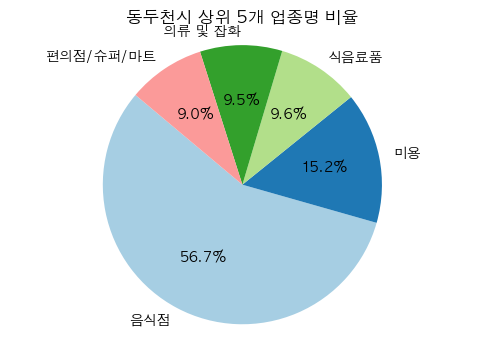

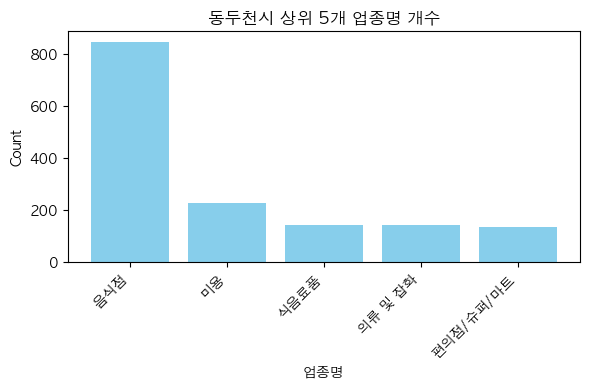

In [38]:
index = 3  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 과천시
음식점        632
교육 및 학습    253
미용         167
식음료품       139
의류 및 잡화    116
Name: 업종명, dtype: int64


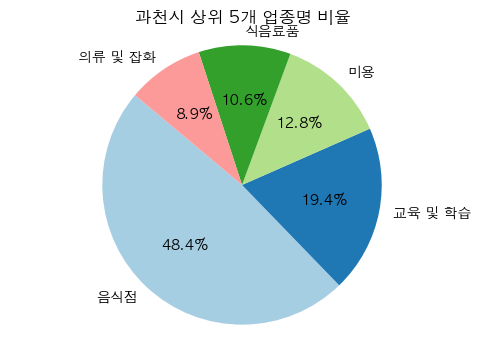

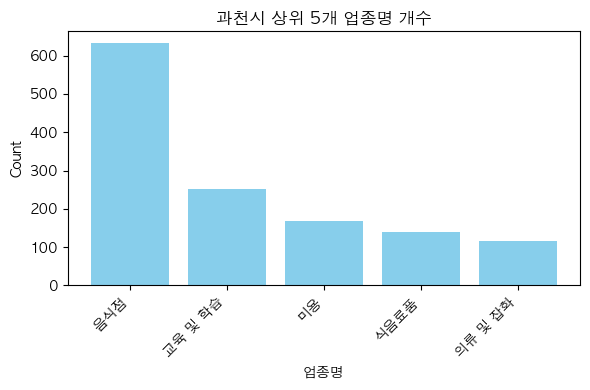

In [39]:
index = 4  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 광명시
음식점           3486
교육 및 학습       1214
미용            1190
식음료품           880
기타레저,스포츠용품     547
Name: 업종명, dtype: int64


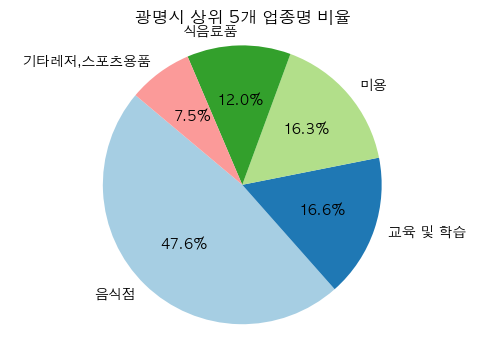

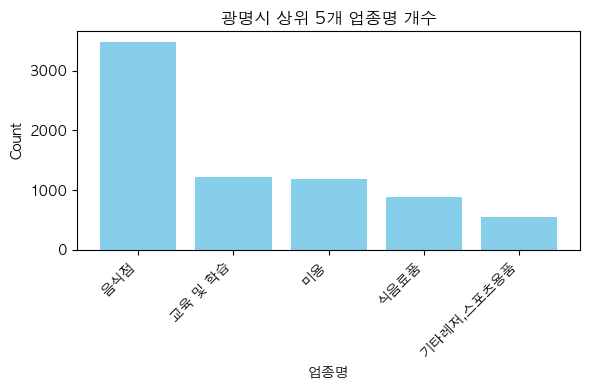

In [40]:
index = 5  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 광주시
음식점          2817
교육 및 학습       771
미용            628
커피 및 베이커리     560
편의점/슈퍼/마트     533
Name: 업종명, dtype: int64


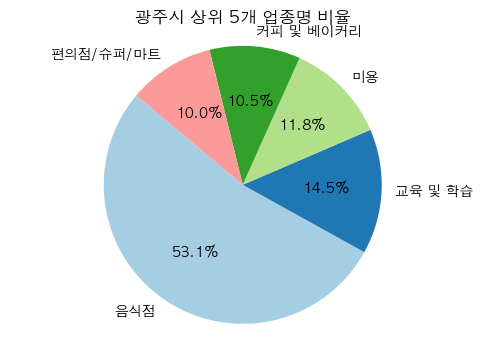

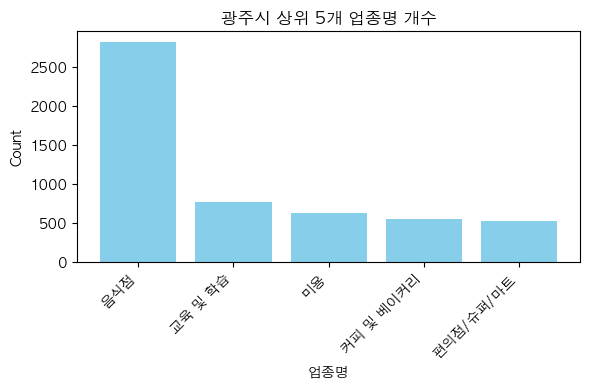

In [41]:
index = 6  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 구리시
음식점          1326
교육 및 학습       485
미용            400
커피 및 베이커리     263
피부 및 헬스       253
Name: 업종명, dtype: int64


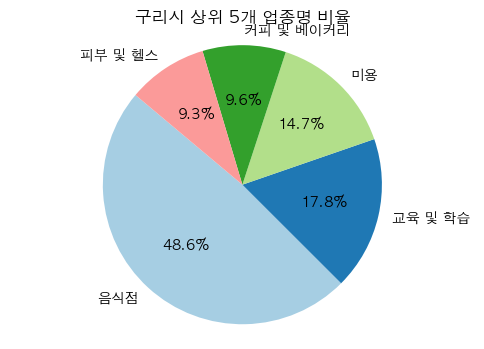

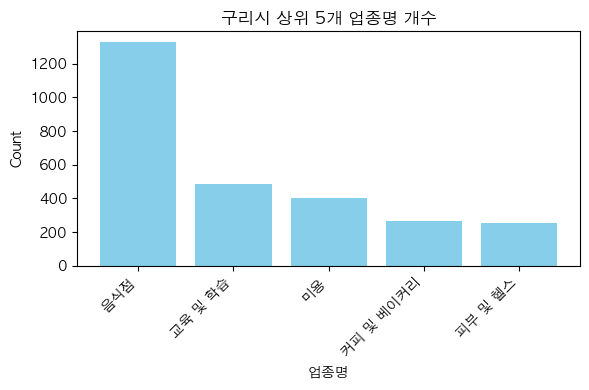

In [42]:
index = 7  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 군포시
음식점          1504
교육 및 학습       653
미용            481
커피 및 베이커리     371
식음료품          301
Name: 업종명, dtype: int64


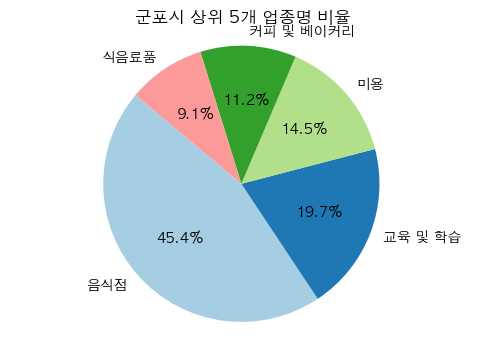

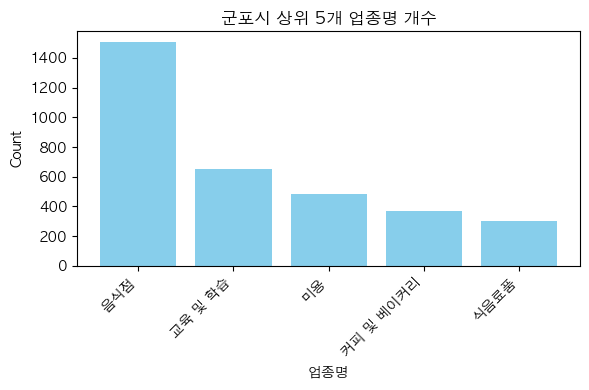

In [43]:
index = 8  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 김포시
음식점          3336
교육 및 학습      1526
미용            817
커피 및 베이커리     713
기타서비스         550
Name: 업종명, dtype: int64


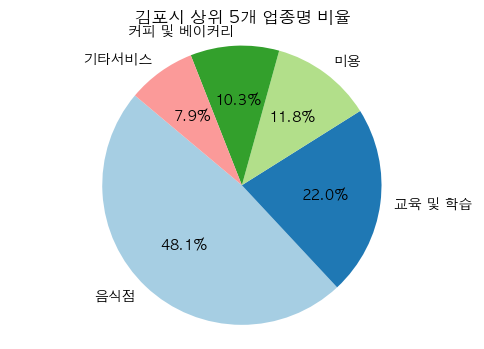

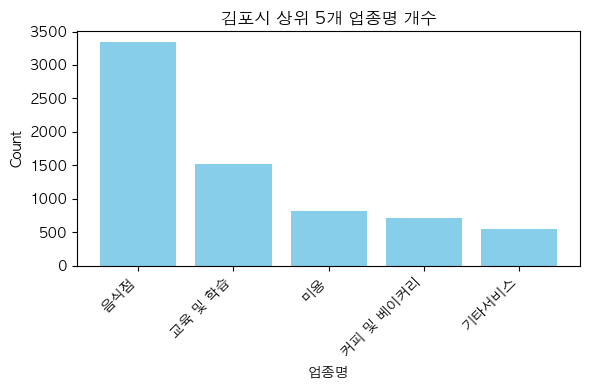

In [44]:
index = 9  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 남양주시
음식점          4680
교육 및 학습      2084
미용           1301
커피 및 베이커리     983
식음료품          813
Name: 업종명, dtype: int64


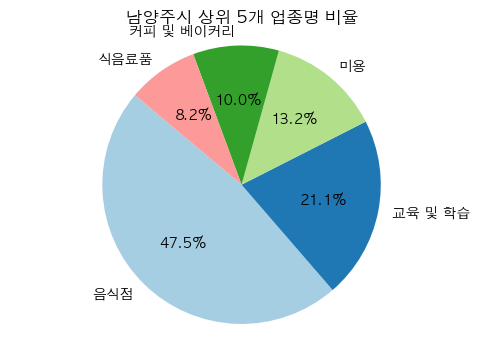

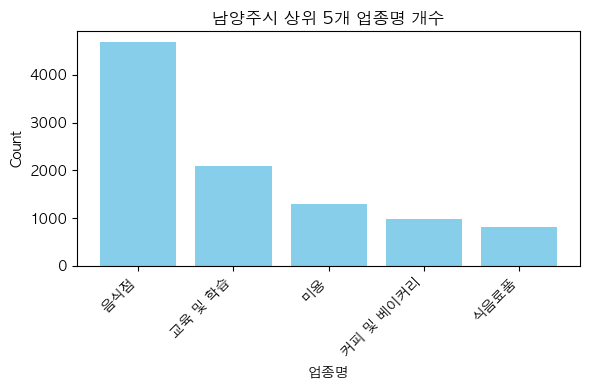

In [45]:
index = 10  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 성남시
음식점        5221
교육 및 학습    2670
기타         2248
미용         2027
의료/보건      1496
Name: 업종명, dtype: int64


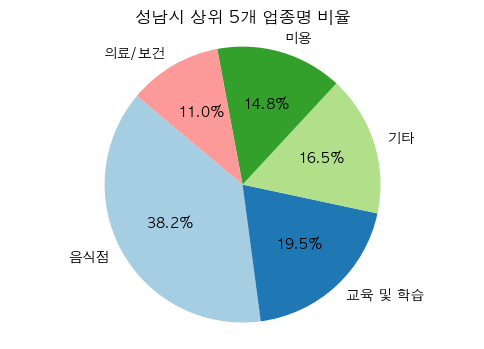

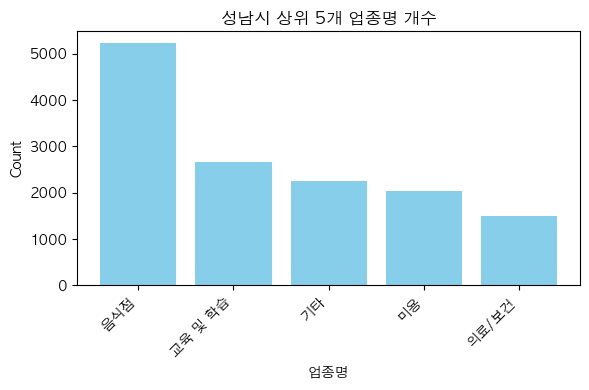

In [46]:
index = 11  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 시흥시
음식점            5898
소매업            3109
개인서비스업         2566
교육 및 학습        1964
기타취미.레저.스포츠     544
Name: 업종명, dtype: int64


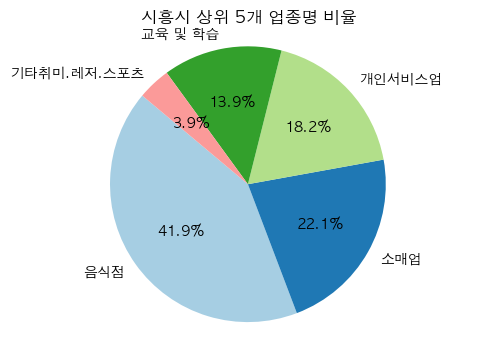

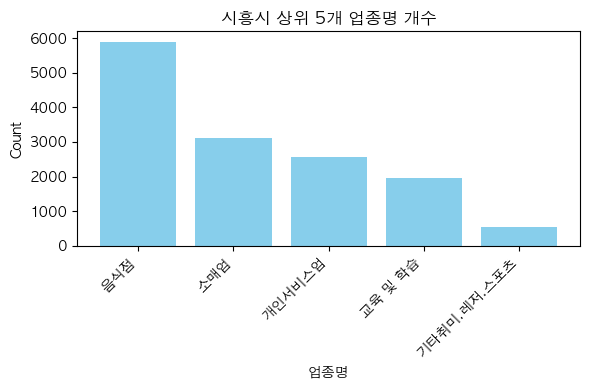

In [47]:
index = 12  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안산시
음식점          4897
미용           1306
교육 및 학습      1157
커피 및 베이커리     948
편의점/슈퍼/마트     939
Name: 업종명, dtype: int64


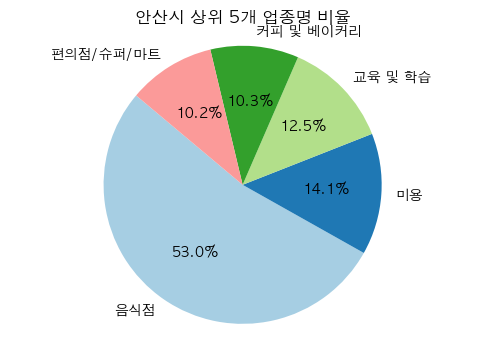

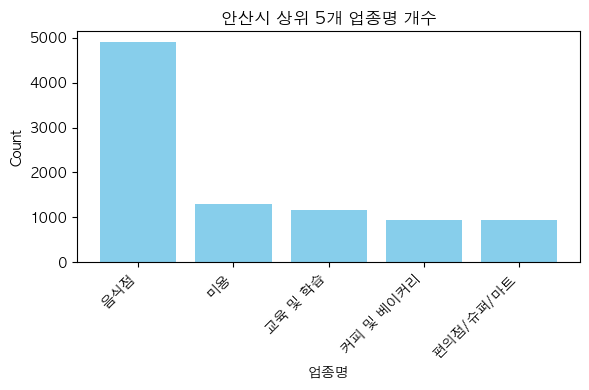

In [48]:
index = 13  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 이천시
음식점          2077
교육 및 학습       472
미용            451
커피 및 베이커리     367
편의점/슈퍼/마트     346
Name: 업종명, dtype: int64


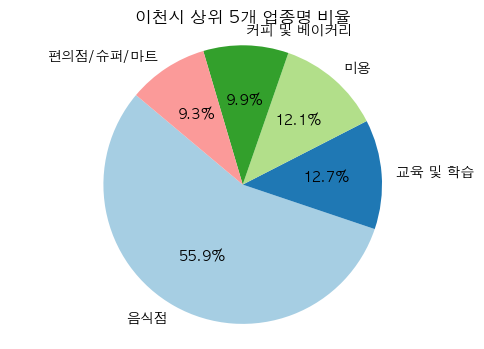

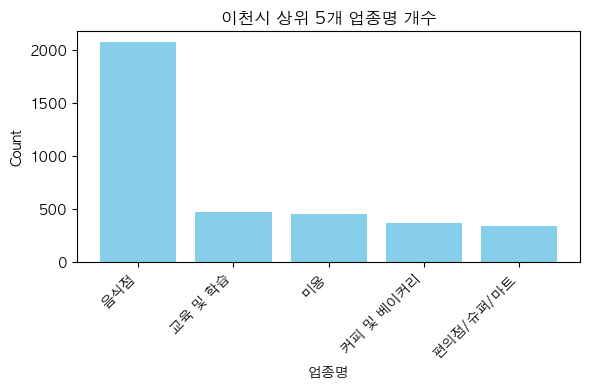

In [49]:
index = 14  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 용인시
음식점          6110
교육 및 학습      3038
미용           1520
커피 및 베이커리    1474
편의점/슈퍼/마트    1100
Name: 업종명, dtype: int64


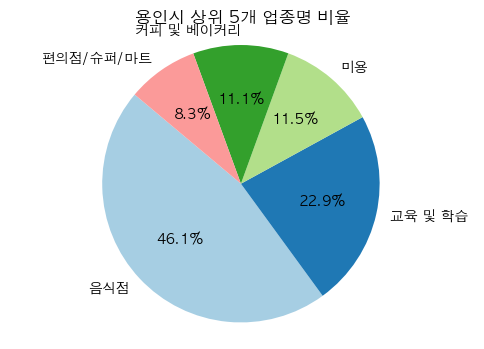

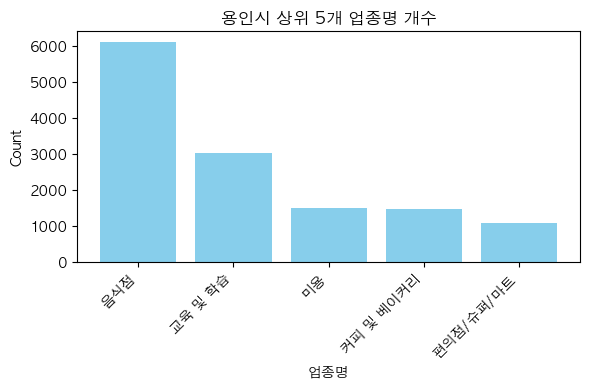

In [50]:
index = 15  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 파주시
음식점          4154
교육 및 학습      1324
커피 및 베이커리     793
미용            766
편의점/슈퍼/마트     604
Name: 업종명, dtype: int64


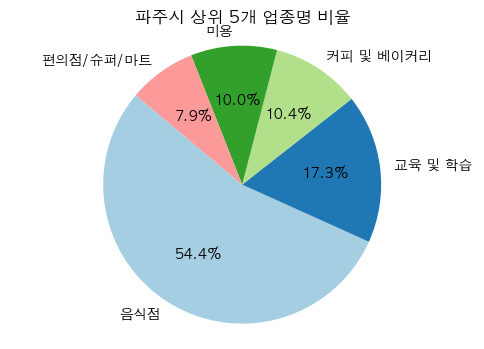

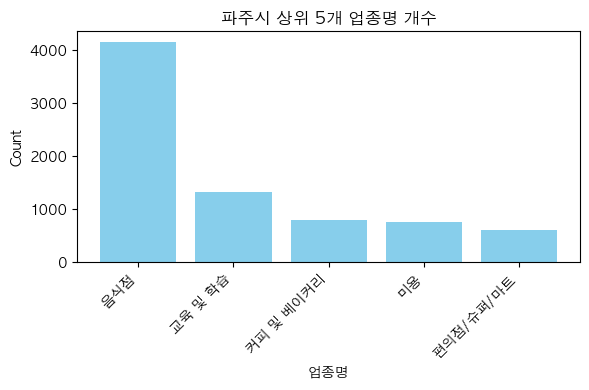

In [51]:
index = 16  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 평택시
음식점        11675
미용          2663
교육 및 학습     2025
식음료품        1934
소매업         1858
Name: 업종명, dtype: int64


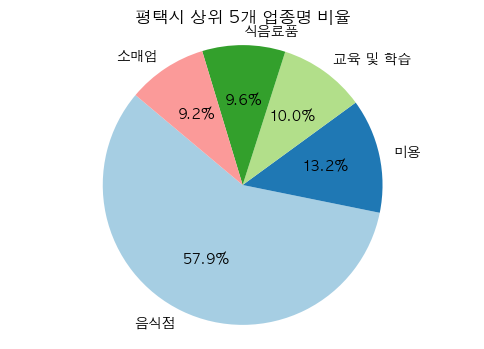

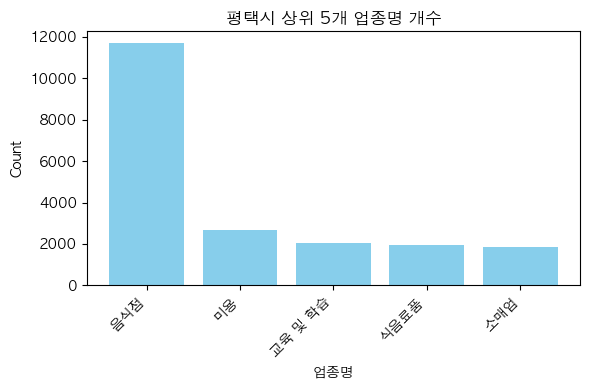

In [52]:
index = 17  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 화성시
음식점          6209
교육 및 학습      3133
커피 및 베이커리    1534
미용           1440
편의점/슈퍼/마트    1200
Name: 업종명, dtype: int64


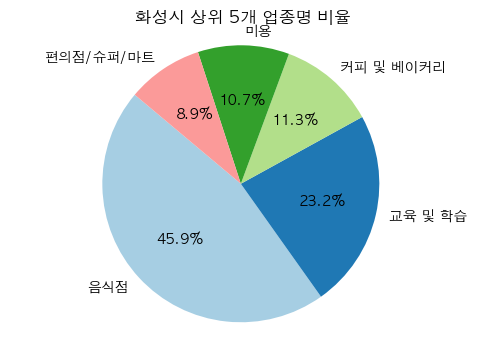

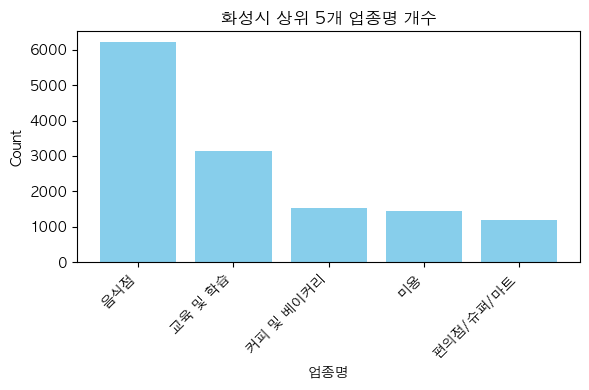

In [53]:
index = 18  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 수원시
음식점          8650
교육 및 학습      3216
미용           2479
커피 및 베이커리    2158
피부 및 헬스      1346
Name: 업종명, dtype: int64


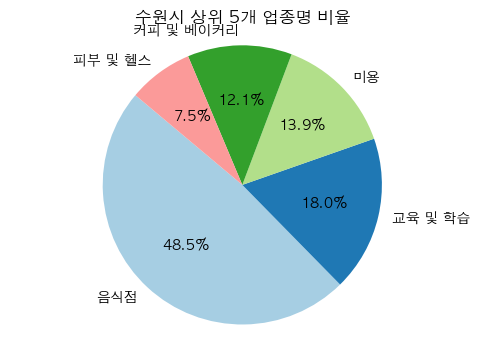

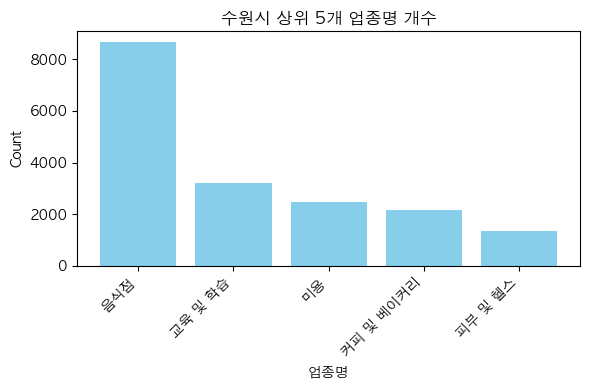

In [54]:
index = 19  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안성시
음식점          2066
미용            407
교육 및 학습       395
편의점/슈퍼/마트     345
커피 및 베이커리     319
Name: 업종명, dtype: int64


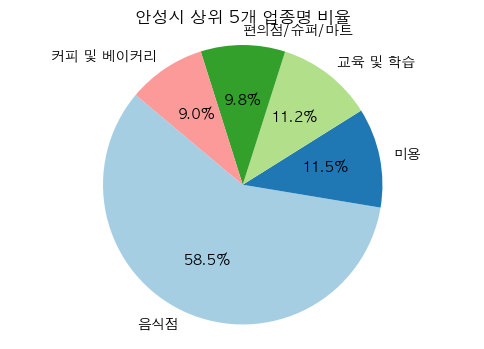

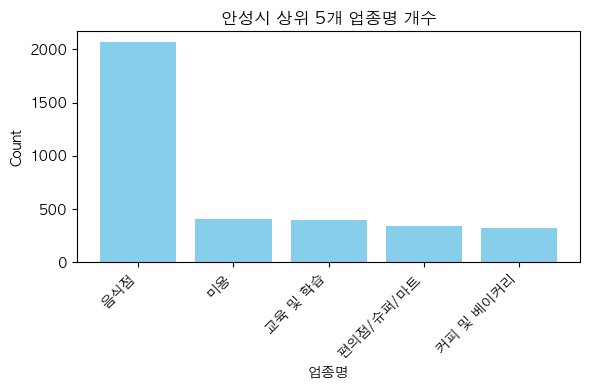

In [55]:
index = 20  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안양시
음식점          3642
교육 및 학습      1493
미용           1054
커피 및 베이커리    1026
식음료품          648
Name: 업종명, dtype: int64


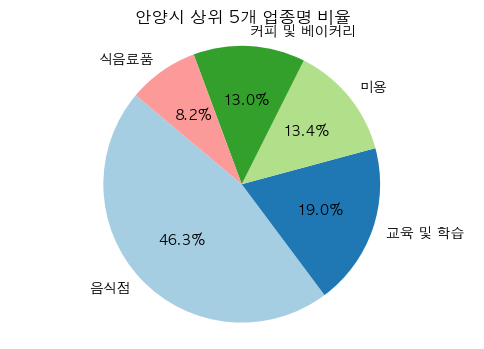

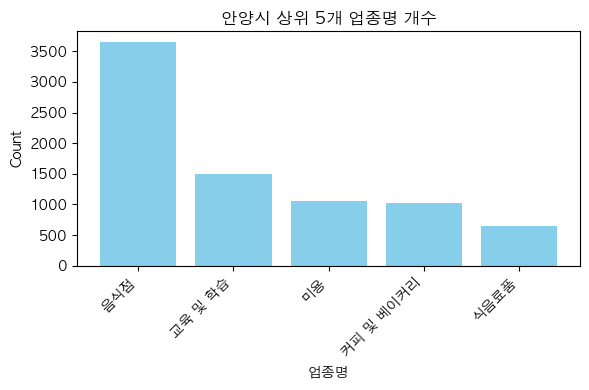

In [56]:
index = 21  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 양주시
음식점          2623
교육 및 학습       724
미용            506
커피 및 베이커리     432
편의점/슈퍼/마트     395
Name: 업종명, dtype: int64


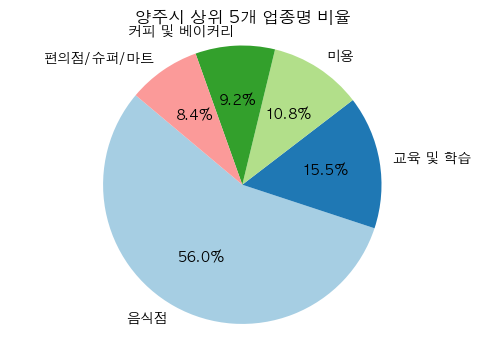

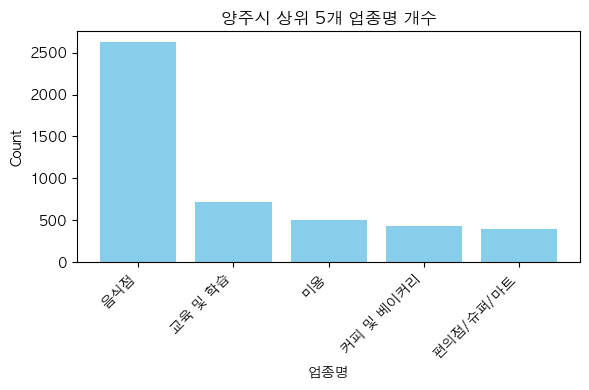

In [57]:
index = 22  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 양평군
음식점          1314
커피 및 베이커리     241
식음료품          205
교육 및 학습       194
편의점/슈퍼/마트     192
Name: 업종명, dtype: int64


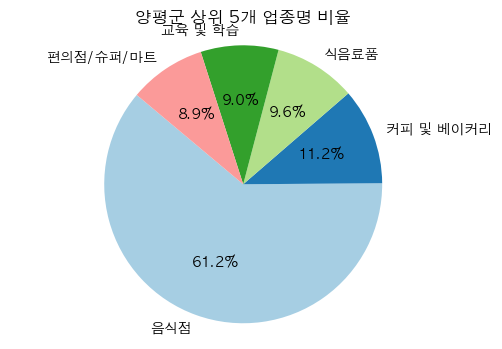

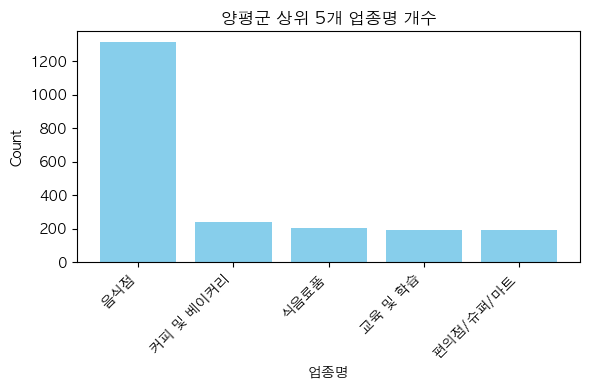

In [58]:
index = 23  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 여주시
음식점          1229
미용            219
편의점/슈퍼/마트     197
식음료품          192
커피 및 베이커리     190
Name: 업종명, dtype: int64


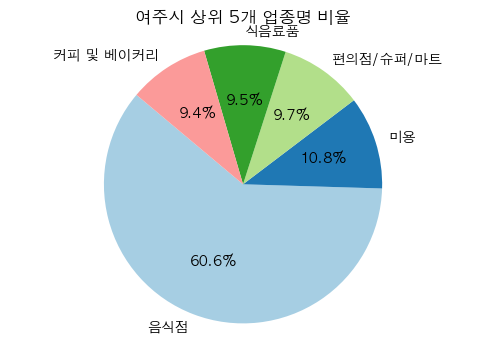

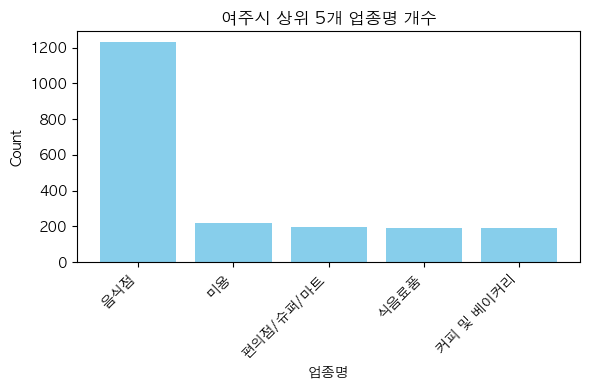

In [59]:
index = 24  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 연천군
음식점          716
식음료품         119
편의점/슈퍼/마트    100
커피 및 베이커리     86
미용            72
Name: 업종명, dtype: int64


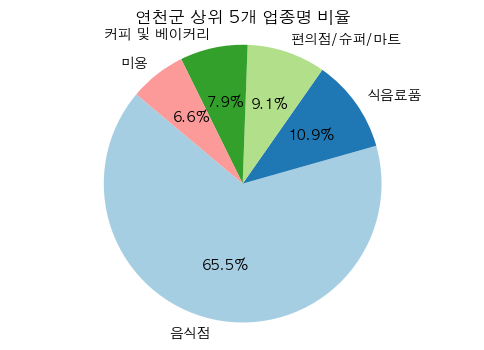

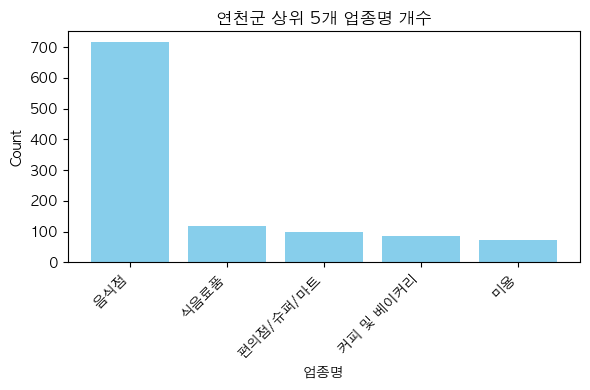

In [60]:
index = 25  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 오산시
음식점          1687
교육 및 학습       581
미용            444
커피 및 베이커리     322
식음료품          264
Name: 업종명, dtype: int64


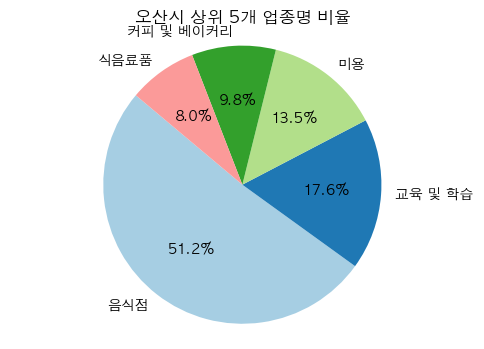

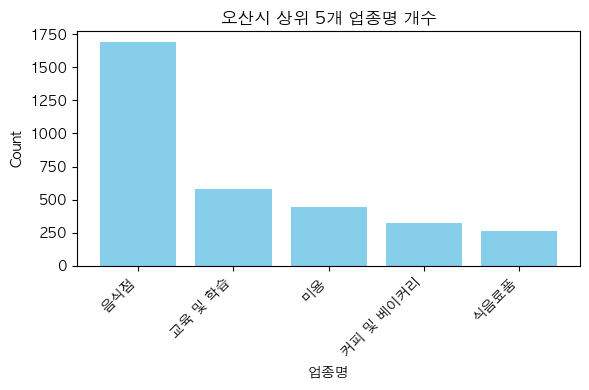

In [61]:
index = 26  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 의왕시
음식점           1241
교육 및 학습        391
미용             377
식음료품           271
기타레저,스포츠용품     183
Name: 업종명, dtype: int64


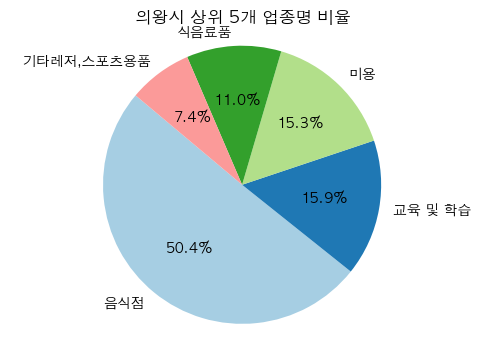

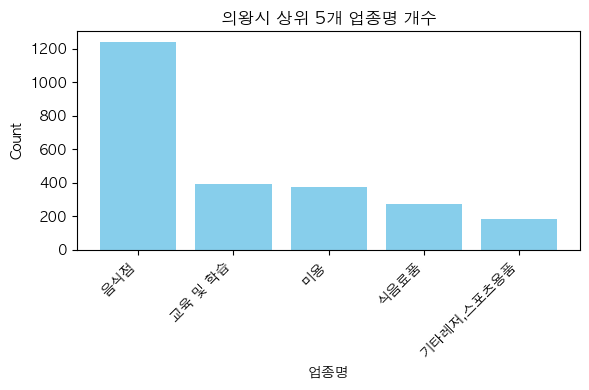

In [62]:
index = 27  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 의정부시
음식점          3066
교육 및 학습       980
미용            931
의류 및 잡화       599
커피 및 베이커리     594
Name: 업종명, dtype: int64


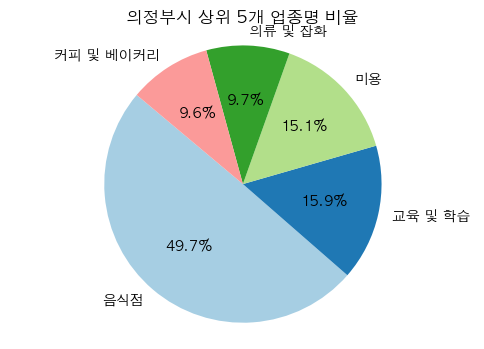

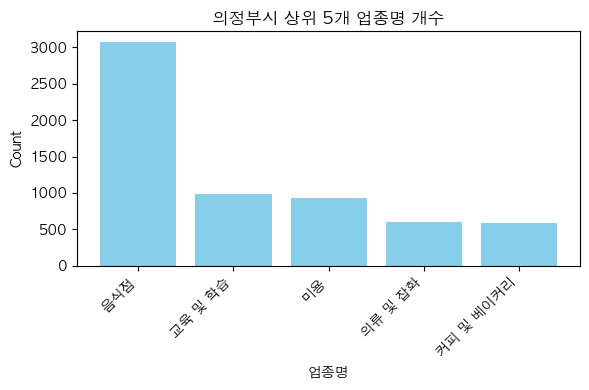

In [63]:
index = 28  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 포천시
음식점          1966
편의점/슈퍼/마트     354
미용            273
식음료품          266
자동차 관련 업종     257
Name: 업종명, dtype: int64


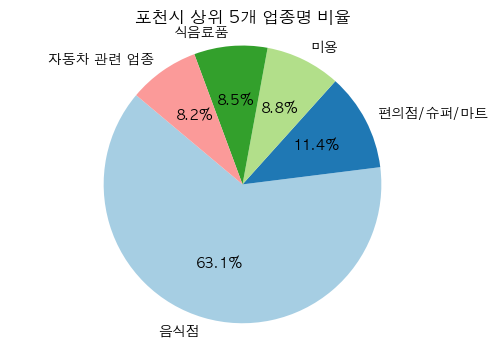

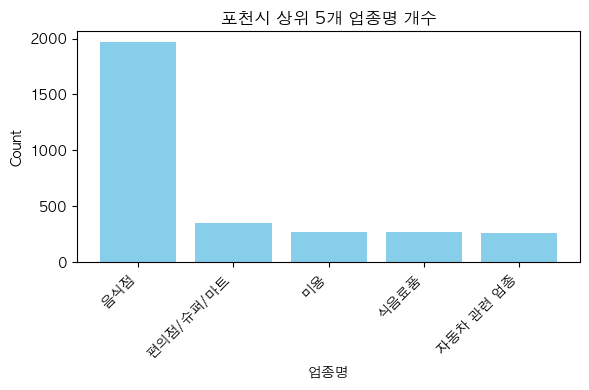

In [64]:
index = 29  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 하남시
음식점          2013
교육 및 학습       907
커피 및 베이커리     489
미용            473
피부 및 헬스       377
Name: 업종명, dtype: int64


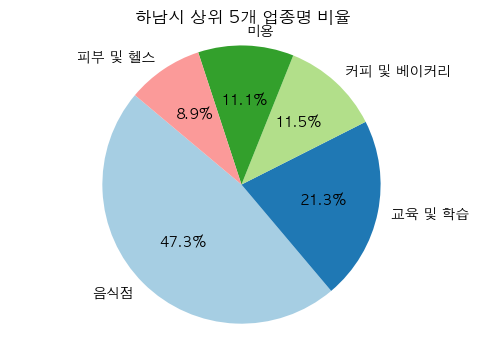

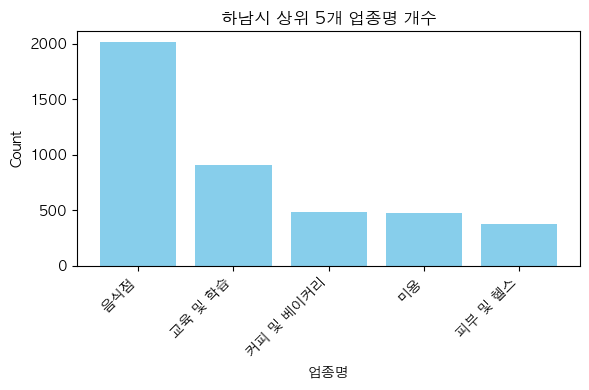

In [65]:
index = 30  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

# 하위 5개도 해보자.

In [66]:
# 하위 5개 추출 하는 함수
def get_bottom_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    bottom_5_industry_count = industry_count.nsmallest(5)
    return bottom_5_industry_count

In [67]:
# 시각화
def plot_bottom_5_industries_by_city(index):
    # 특정 시군명의 하위 5개 업종명을 계산
    bottom_5_industries = get_bottom_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(8, 6))  # 크기를 조절
    plt.pie(bottom_5_industries, labels=bottom_5_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 하위 5개 업종명 비율")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(10, 6))  # 크기를 조절
    plt.bar(bottom_5_industries.index, bottom_5_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 하위 5개 업종명 개수")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

City/County: 고양시
대학교.대학원    1
웨딩토탈서비스    1
기타무점포      1
주유소        1
택배서비스      1
Name: 업종명, dtype: int64


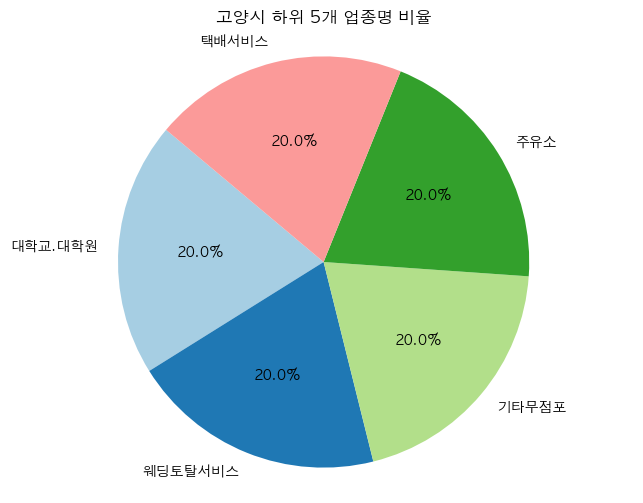

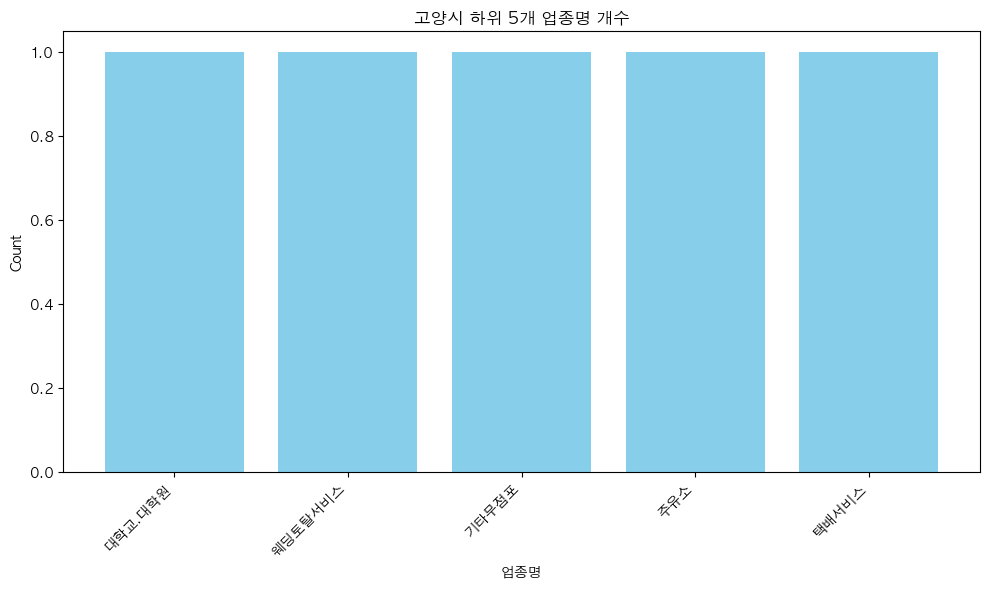

In [68]:
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)

City/County: 가평군
양복점.한복점       1
기계.장비(기타)     1
총포류           1
오양.보육.복지시설    1
기타대인서비스       1
Name: 업종명, dtype: int64


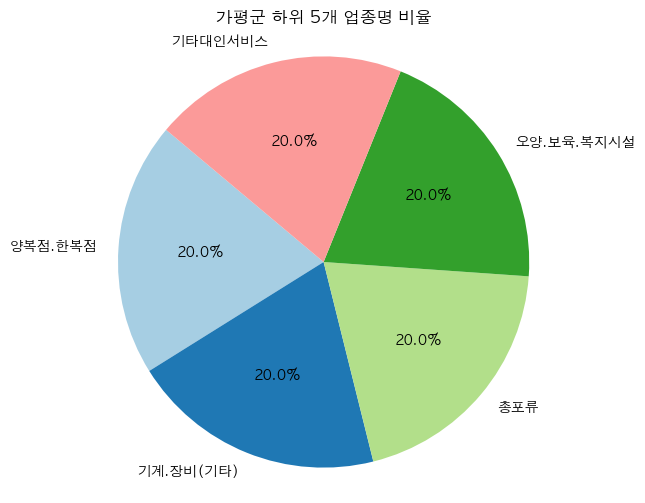

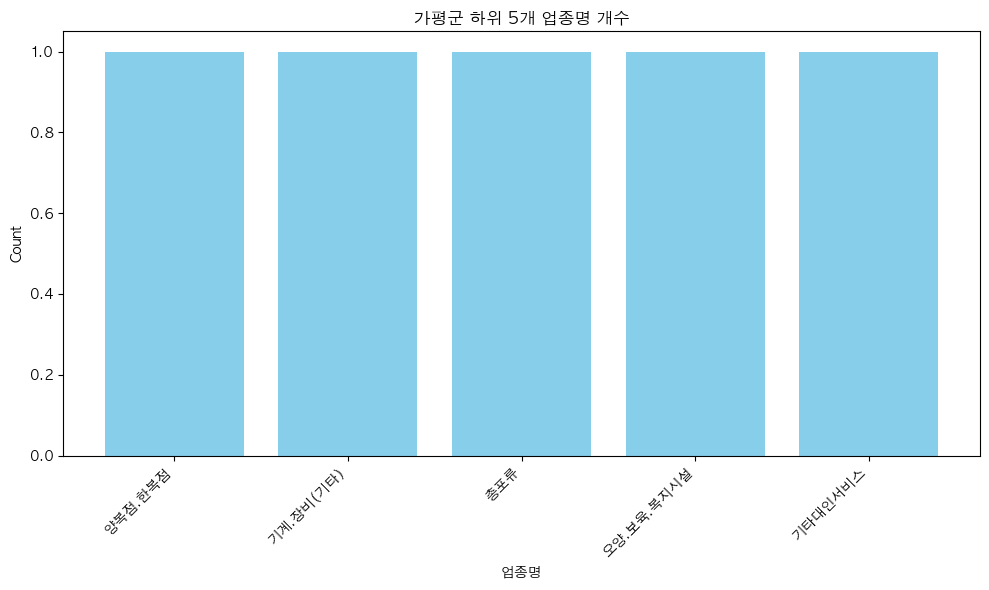

In [69]:
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)

### 아무리 봐도 하위 5개는 할 필요가 없어보임.

- 이제 휴/폐업이 전적이 없는 데이터만 뽑아 시각화를 해보자.
- 휴/폐업 전적이 있는 데이터만 뽑아 시각화를 해보자.

In [76]:
df1.head()

시군명       상호명         업종명  업종코드 휴폐업상태 폐업일자   데이터기준일자
0  고양시   까망노래연습장         노래방  8402   NaN  NaN  20240331
1  고양시  일산좋은치과의원          치과  4201   NaN  NaN  20240331
2  고양시       잉크존     문구,사무용품  8102   NaN  NaN  20240331
3  고양시      참좋은집  오양.보육.복지시설  7301   NaN  NaN  20240331
4  고양시   (주)팩토리빈   커피 및 베이커리  2502   NaN  NaN  20240331

In [77]:
# NaN 값을 "계속사업자"로 채우기
df1['휴폐업상태'] = df1['휴폐업상태'].fillna("계속사업자")

# 결과 확인
df1['휴폐업상태'].head()

0    계속사업자
1    계속사업자
2    계속사업자
3    계속사업자
4    계속사업자
Name: 휴폐업상태, dtype: object

In [78]:
# '휴폐업상태'가 '계속사업자'인 데이터만 필터링하여 df2에 저장
df2 = df1[df1['휴폐업상태'] == '계속사업자']

# df2 확인
print(df2.shape)
df2.head()

(403391, 7)


시군명       상호명         업종명  업종코드  휴폐업상태 폐업일자   데이터기준일자
0  고양시   까망노래연습장         노래방  8402  계속사업자  NaN  20240331
1  고양시  일산좋은치과의원          치과  4201  계속사업자  NaN  20240331
2  고양시       잉크존     문구,사무용품  8102  계속사업자  NaN  20240331
3  고양시      참좋은집  오양.보육.복지시설  7301  계속사업자  NaN  20240331
4  고양시   (주)팩토리빈   커피 및 베이커리  2502  계속사업자  NaN  20240331

In [79]:
df2.describe()

업종코드     데이터기준일자
count  403391.000000    403391.0
mean     3767.926005  20240331.0
std      2495.583416         0.0
min      1000.000000  20240331.0
25%      2301.000000  20240331.0
50%      2302.000000  20240331.0
75%      5602.000000  20240331.0
max      9906.000000  20240331.0

## 계속사업자 기준 시군명 별 상위 5개 시각화

In [133]:
# 시군명을 리스트로 저장
city_county_names = df2['시군명'].unique().tolist()

# 특정 시군명의 상위 5개 업종명을 계산하는 함수
def get_top_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    top_5_industry_count = industry_count.nlargest(5)
    return top_5_industry_count

In [134]:
import matplotlib.pyplot as plt

def plot_top_5_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(6, 4))
    plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 상위 5개 업종명 비율(계속사업자)")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(6, 4))
    plt.bar(top_10_industries.index, top_10_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 상위 5개 업종명 개수(계속사업자)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [135]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

City/County: 고양시
음식점          5646
교육 및 학습      2597
미용           1667
커피 및 베이커리    1407
피부 및 헬스       971
Name: 업종명, dtype: int64


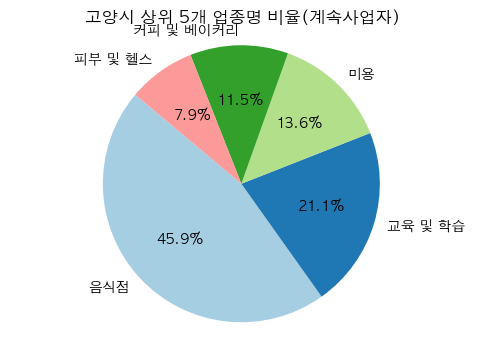

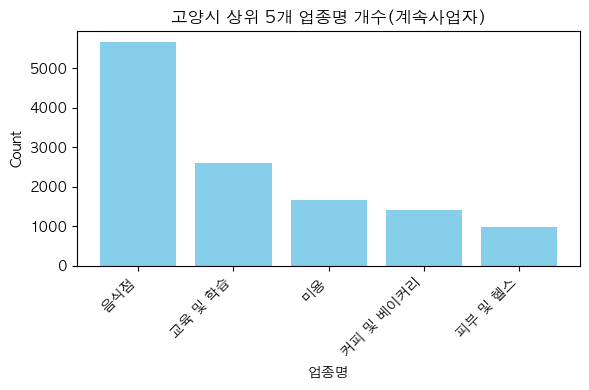

In [136]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 가평군
음식점          1086
숙박업           233
식음료품          170
커피 및 베이커리     160
편의점/슈퍼/마트     150
Name: 업종명, dtype: int64


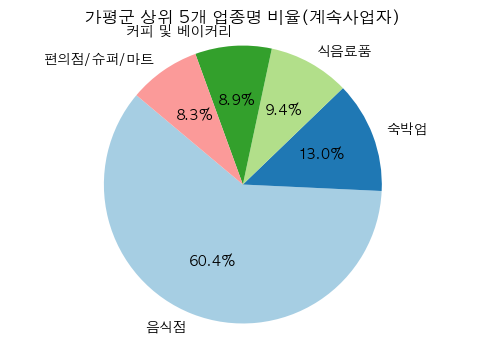

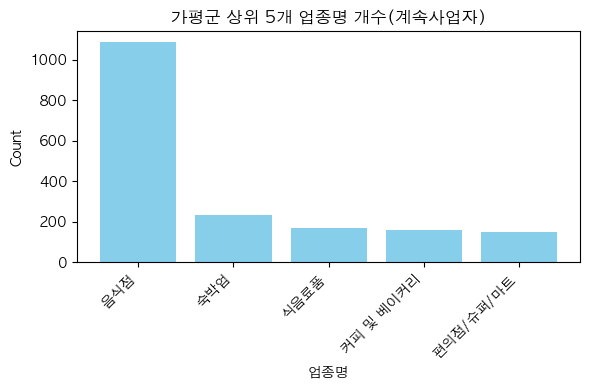

In [137]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 부천시
음식점          5343
교육 및 학습      1746
미용           1726
커피 및 베이커리    1240
피부 및 헬스       939
Name: 업종명, dtype: int64


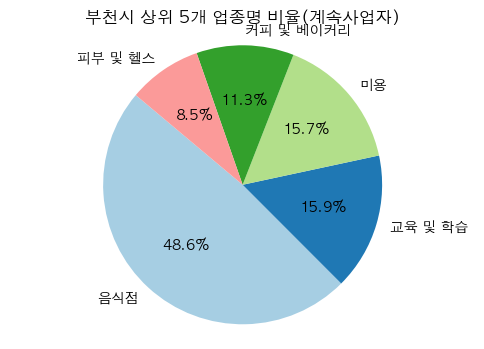

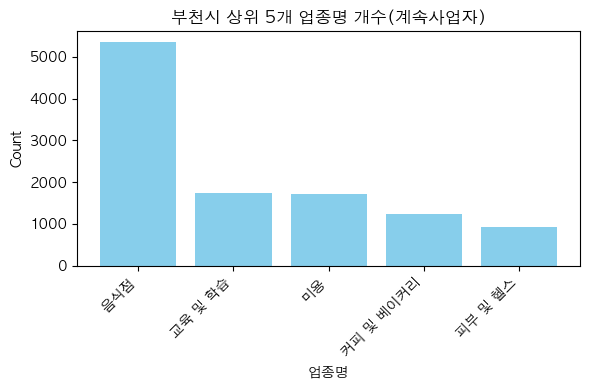

In [138]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 동두천시
음식점          846
미용           227
식음료품         143
의류 및 잡화      142
편의점/슈퍼/마트    134
Name: 업종명, dtype: int64


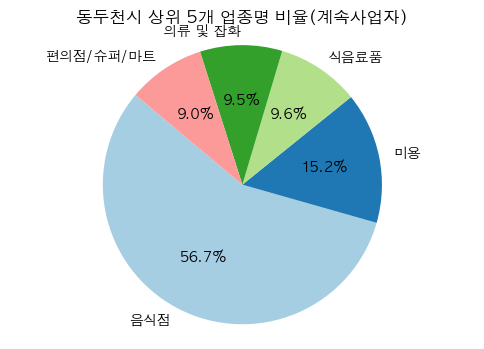

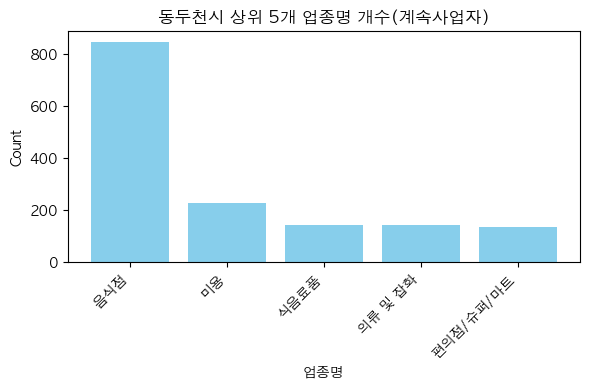

In [139]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 3  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 과천시
음식점        632
교육 및 학습    253
미용         167
식음료품       139
의류 및 잡화    116
Name: 업종명, dtype: int64


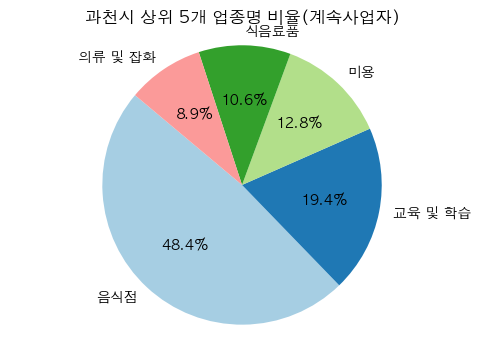

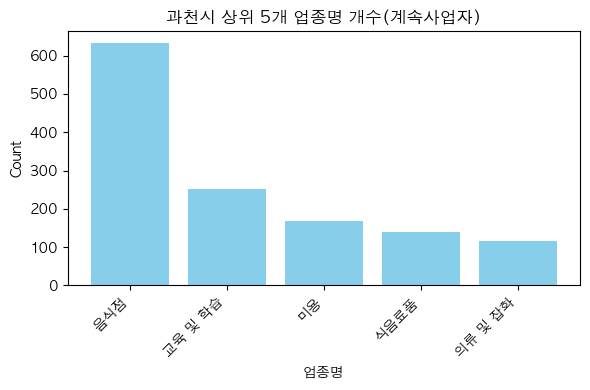

In [140]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 4  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 광명시
음식점           3486
교육 및 학습       1214
미용            1190
식음료품           880
기타레저,스포츠용품     547
Name: 업종명, dtype: int64


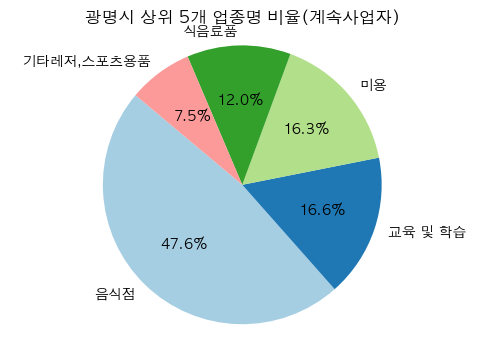

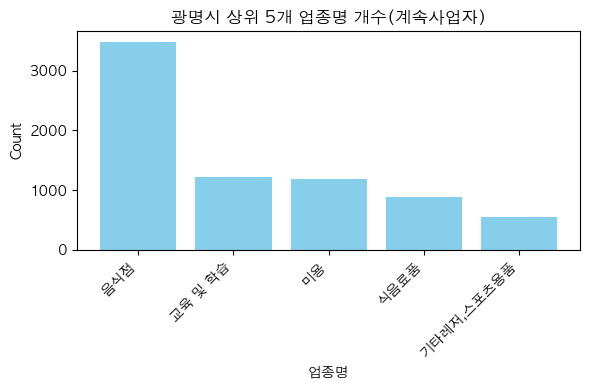

In [141]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 5  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 광주시
음식점          2817
교육 및 학습       771
미용            628
커피 및 베이커리     560
편의점/슈퍼/마트     533
Name: 업종명, dtype: int64


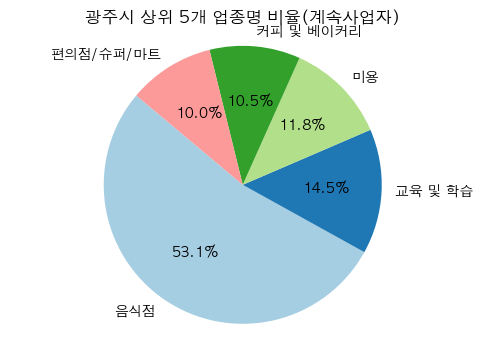

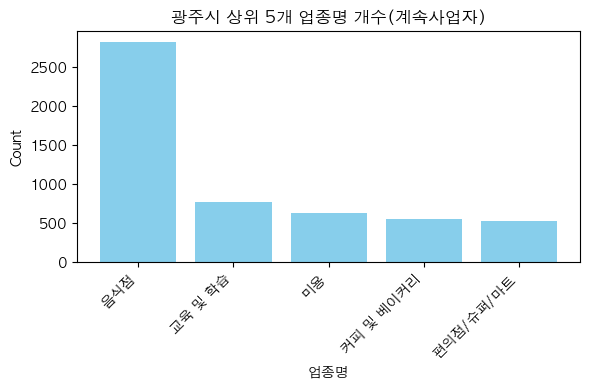

In [142]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 6  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 구리시
음식점          1326
교육 및 학습       485
미용            400
커피 및 베이커리     263
피부 및 헬스       253
Name: 업종명, dtype: int64


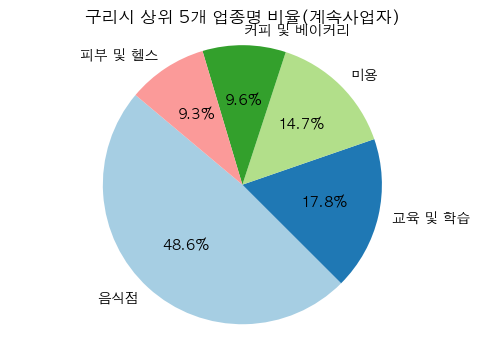

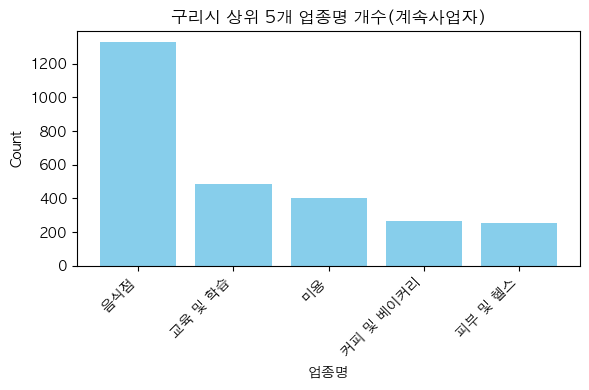

In [143]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 7  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 군포시
음식점          1504
교육 및 학습       653
미용            481
커피 및 베이커리     371
식음료품          301
Name: 업종명, dtype: int64


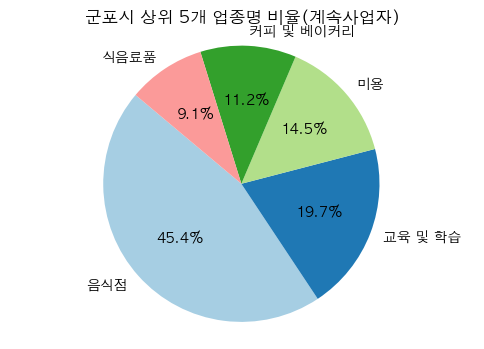

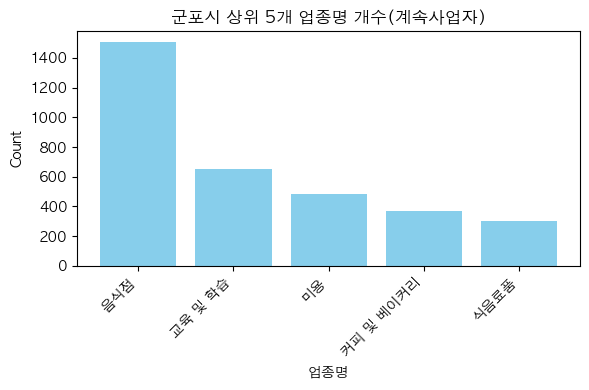

In [144]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 8  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 김포시
음식점          3336
교육 및 학습      1526
미용            817
커피 및 베이커리     713
기타서비스         550
Name: 업종명, dtype: int64


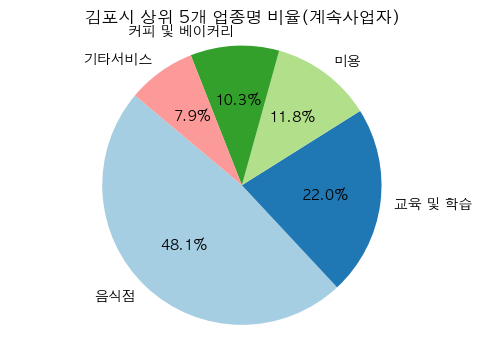

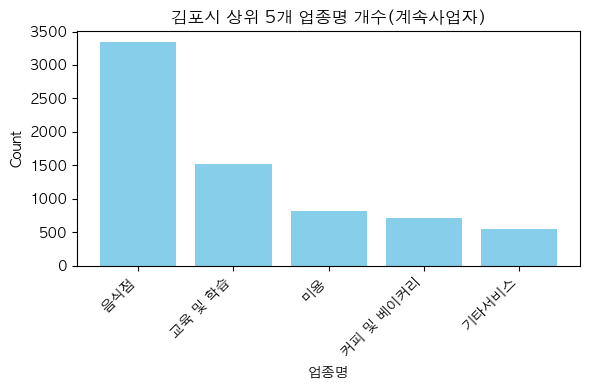

In [145]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 9  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 남양주시
음식점          4680
교육 및 학습      2084
미용           1301
커피 및 베이커리     983
식음료품          813
Name: 업종명, dtype: int64


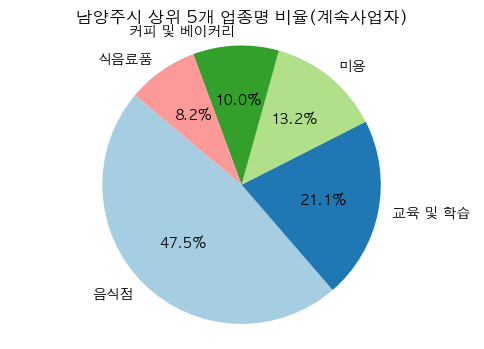

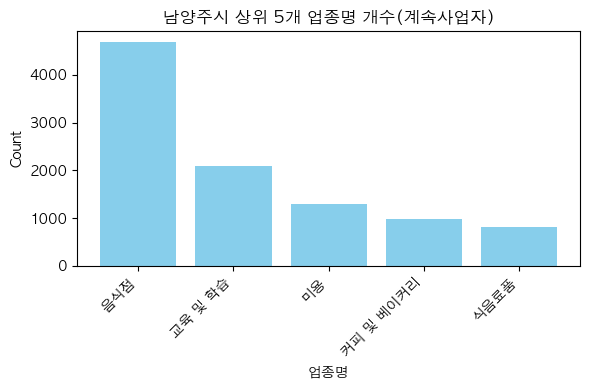

In [146]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 10  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 성남시
음식점        5221
교육 및 학습    2670
기타         2248
미용         2027
의료/보건      1496
Name: 업종명, dtype: int64


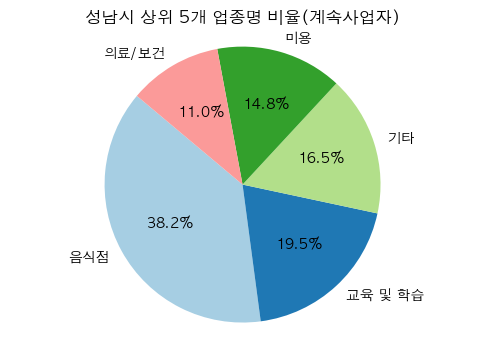

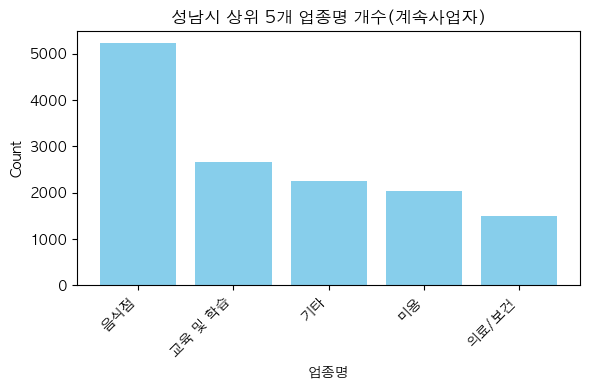

In [147]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 11  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 부천시
음식점          5343
교육 및 학습      1746
미용           1726
커피 및 베이커리    1240
피부 및 헬스       939
Name: 업종명, dtype: int64


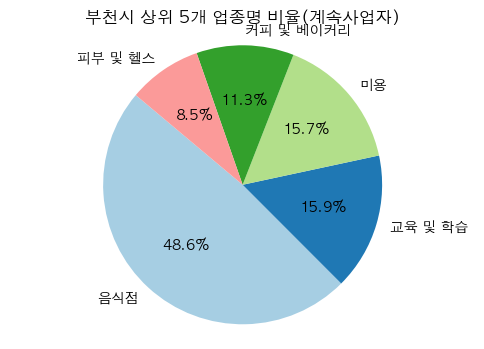

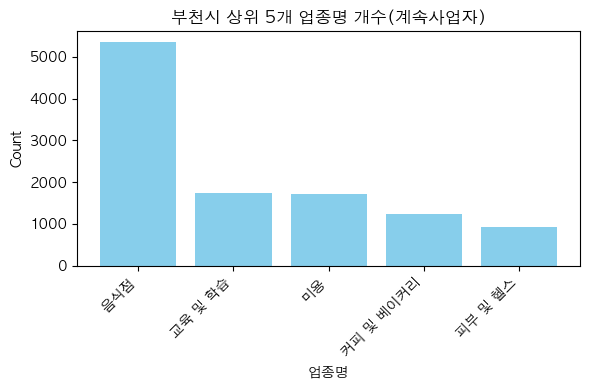

In [148]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 안산시
음식점          4897
미용           1306
교육 및 학습      1157
커피 및 베이커리     948
편의점/슈퍼/마트     939
Name: 업종명, dtype: int64


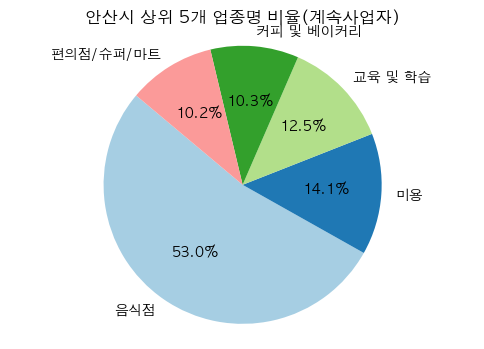

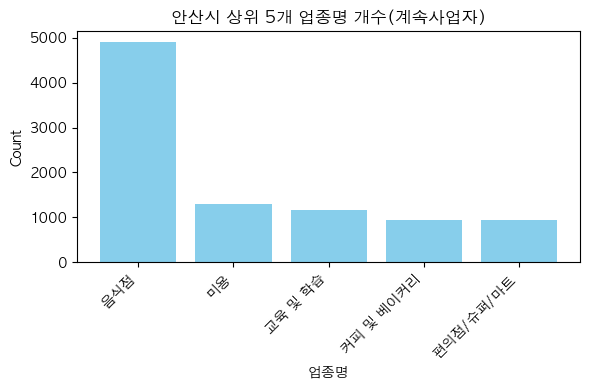

In [149]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 13 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 이천시
음식점          2077
교육 및 학습       472
미용            451
커피 및 베이커리     367
편의점/슈퍼/마트     346
Name: 업종명, dtype: int64


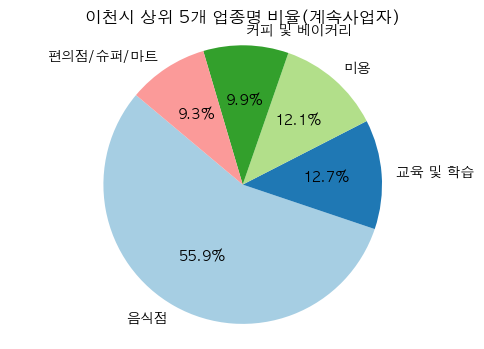

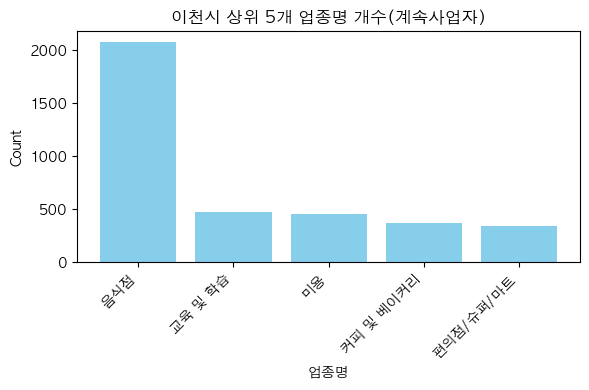

In [150]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 14 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 용인시
음식점          6110
교육 및 학습      3038
미용           1520
커피 및 베이커리    1474
편의점/슈퍼/마트    1100
Name: 업종명, dtype: int64


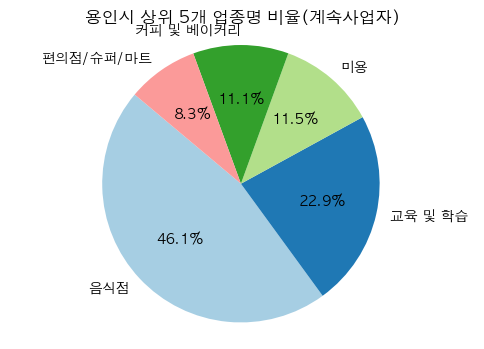

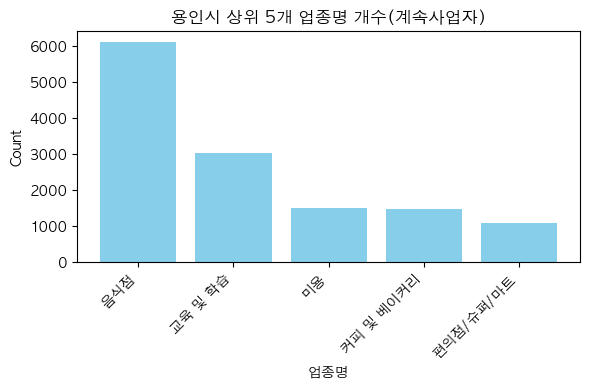

In [151]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 15 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 파주시
음식점          4154
교육 및 학습      1324
커피 및 베이커리     793
미용            766
편의점/슈퍼/마트     604
Name: 업종명, dtype: int64


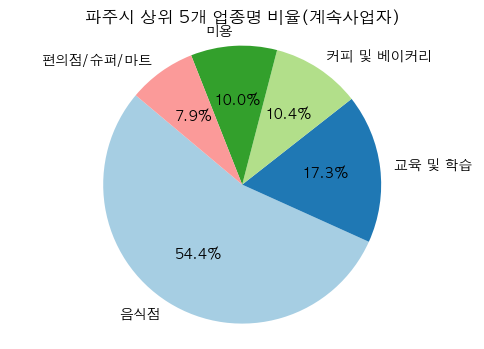

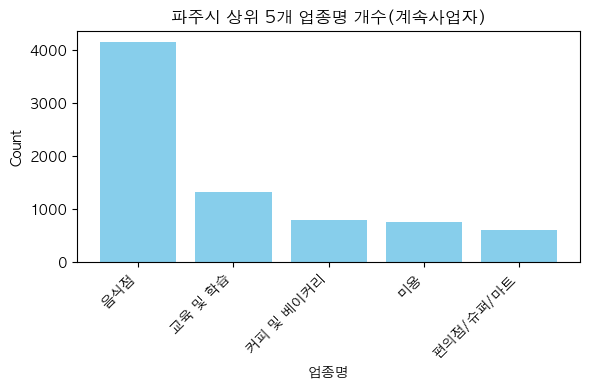

In [152]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 16 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 평택시
음식점        11675
미용          2663
교육 및 학습     2025
식음료품        1934
소매업         1858
Name: 업종명, dtype: int64


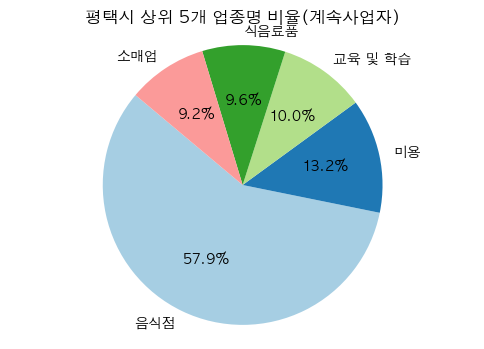

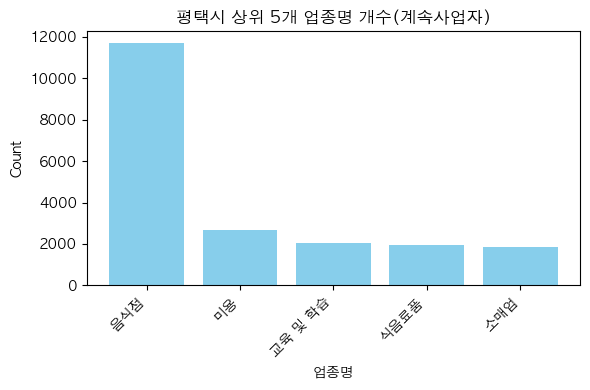

In [153]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 17 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 화성시
음식점          6209
교육 및 학습      3133
커피 및 베이커리    1534
미용           1440
편의점/슈퍼/마트    1200
Name: 업종명, dtype: int64


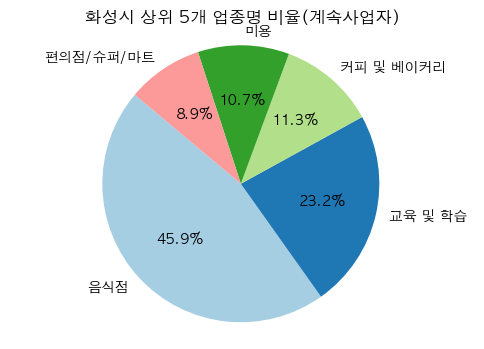

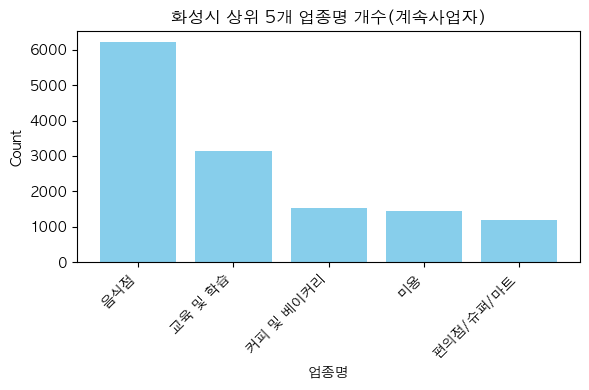

In [154]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 18 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 수원시
음식점          8650
교육 및 학습      3216
미용           2479
커피 및 베이커리    2158
피부 및 헬스      1346
Name: 업종명, dtype: int64


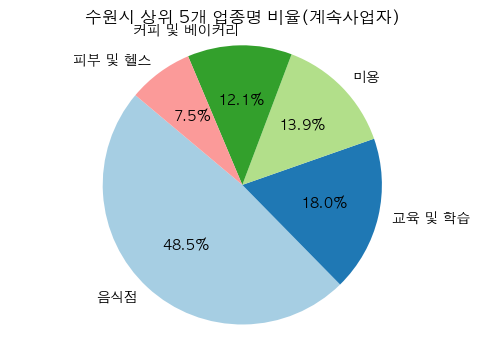

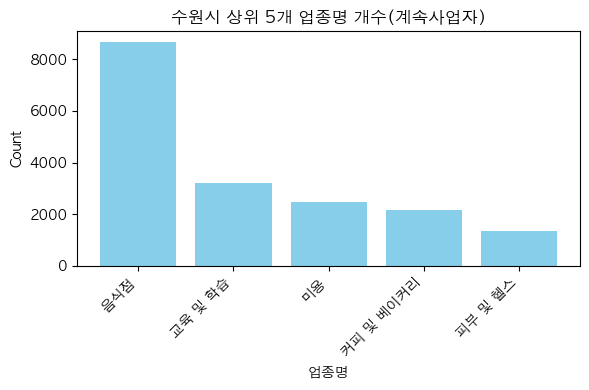

In [155]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 19 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 안성시
음식점          2066
미용            407
교육 및 학습       395
편의점/슈퍼/마트     345
커피 및 베이커리     319
Name: 업종명, dtype: int64


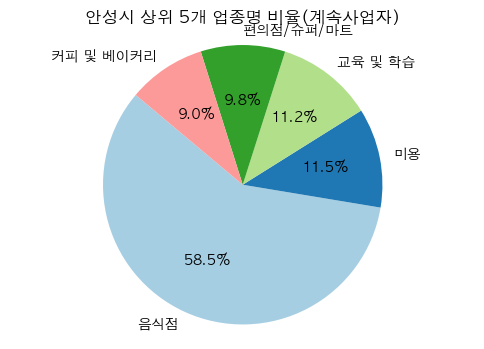

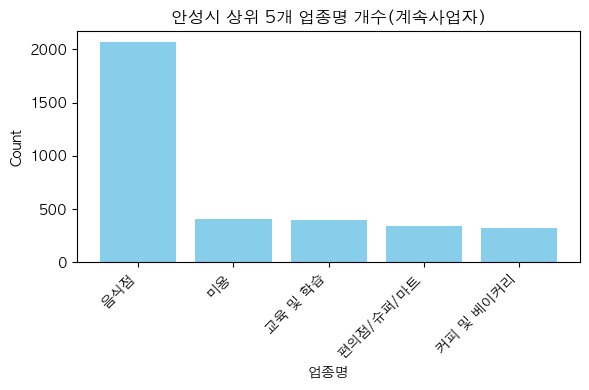

In [156]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 20 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 안양시
음식점          3642
교육 및 학습      1493
미용           1054
커피 및 베이커리    1026
식음료품          648
Name: 업종명, dtype: int64


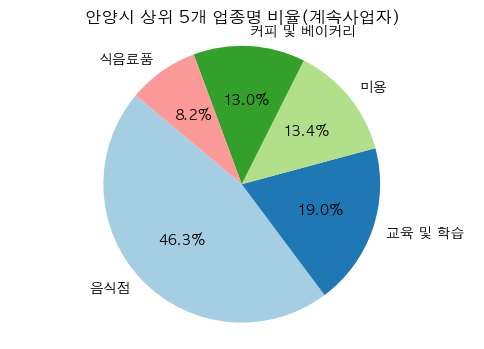

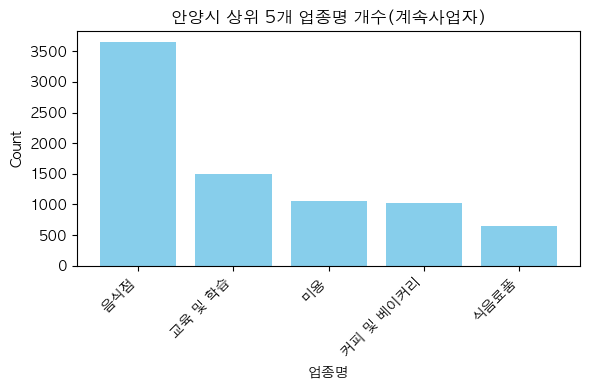

In [157]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 21 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 안양시
음식점          3642
교육 및 학습      1493
미용           1054
커피 및 베이커리    1026
식음료품          648
Name: 업종명, dtype: int64


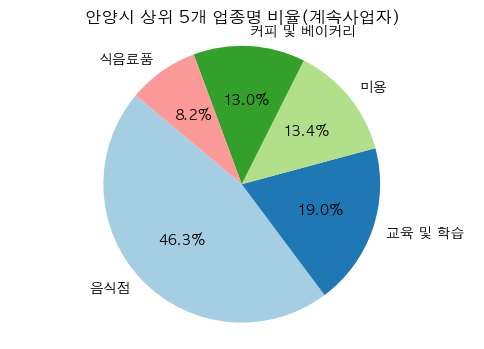

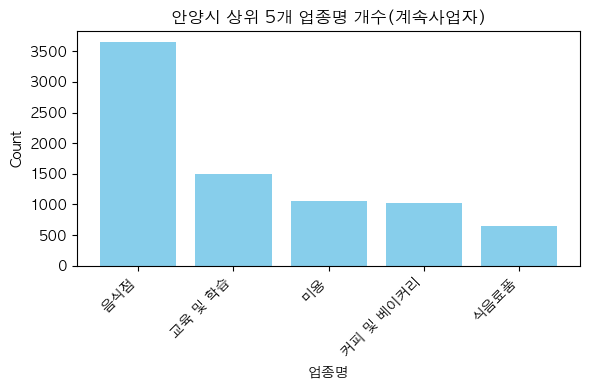

In [158]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 21 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 양주시
음식점          2623
교육 및 학습       724
미용            506
커피 및 베이커리     432
편의점/슈퍼/마트     395
Name: 업종명, dtype: int64


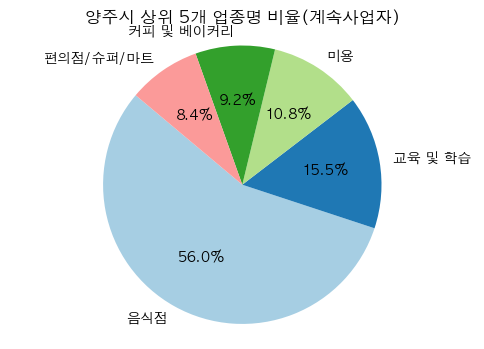

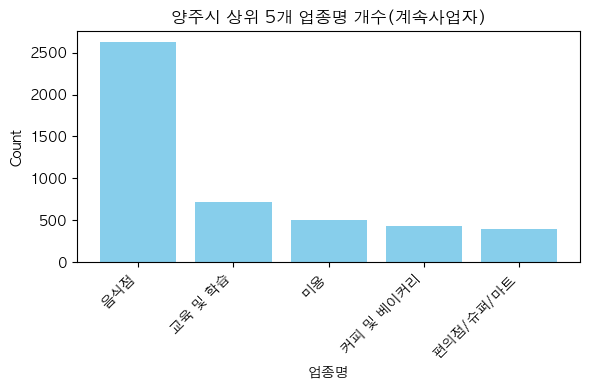

In [159]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 22 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 양평군
음식점          1314
커피 및 베이커리     241
식음료품          205
교육 및 학습       194
편의점/슈퍼/마트     192
Name: 업종명, dtype: int64


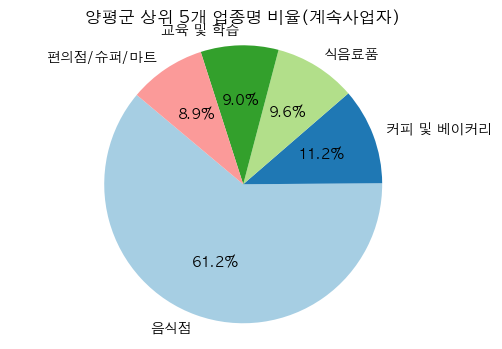

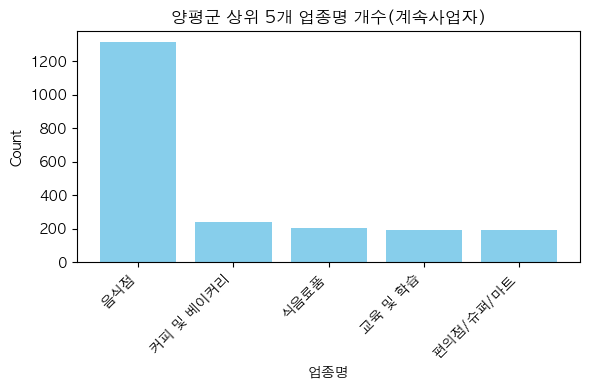

In [160]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 23 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 여주시
음식점          1229
미용            219
편의점/슈퍼/마트     197
식음료품          192
커피 및 베이커리     190
Name: 업종명, dtype: int64


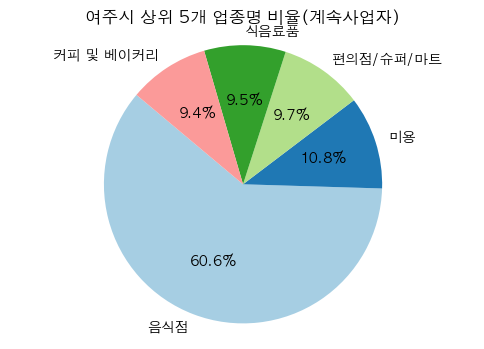

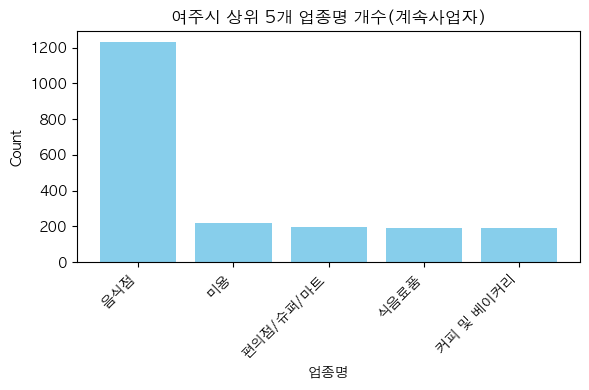

In [161]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 24 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 연천군
음식점          716
식음료품         119
편의점/슈퍼/마트    100
커피 및 베이커리     86
미용            72
Name: 업종명, dtype: int64


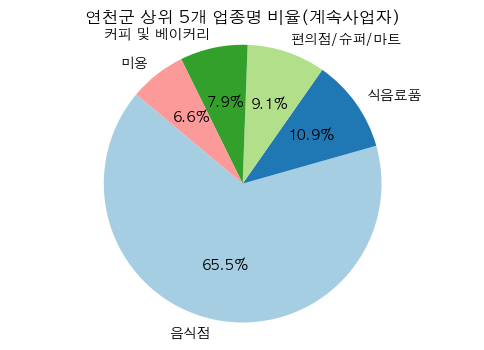

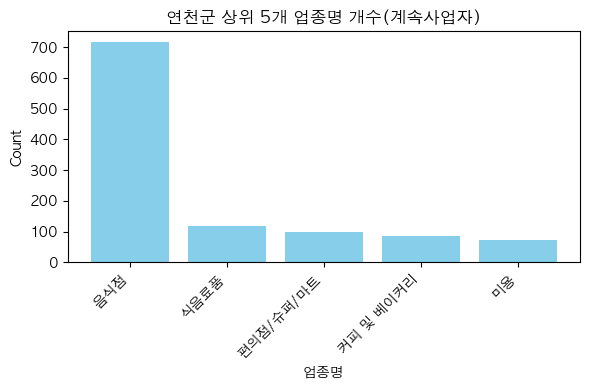

In [162]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 25 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 오산시
음식점          1687
교육 및 학습       581
미용            444
커피 및 베이커리     322
식음료품          264
Name: 업종명, dtype: int64


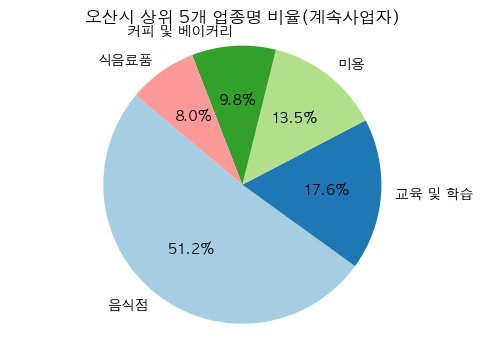

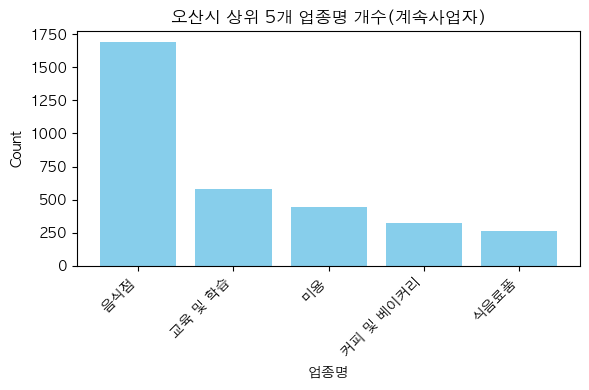

In [163]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 26 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 의왕시
음식점           1241
교육 및 학습        391
미용             377
식음료품           271
기타레저,스포츠용품     183
Name: 업종명, dtype: int64


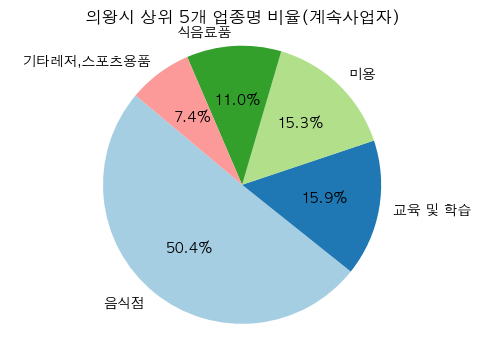

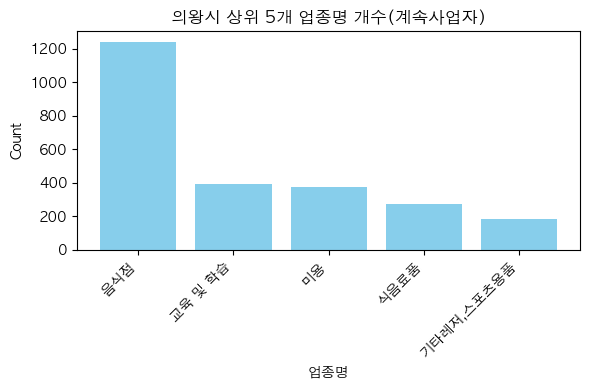

In [164]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 27 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 의정부시
음식점          3066
교육 및 학습       980
미용            931
의류 및 잡화       599
커피 및 베이커리     594
Name: 업종명, dtype: int64


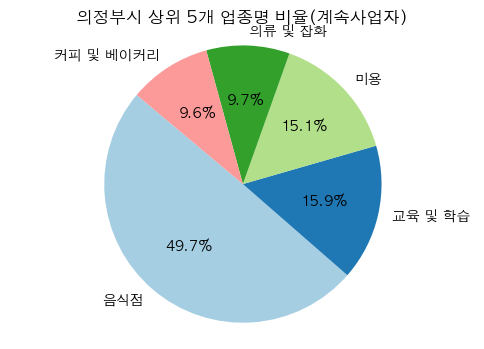

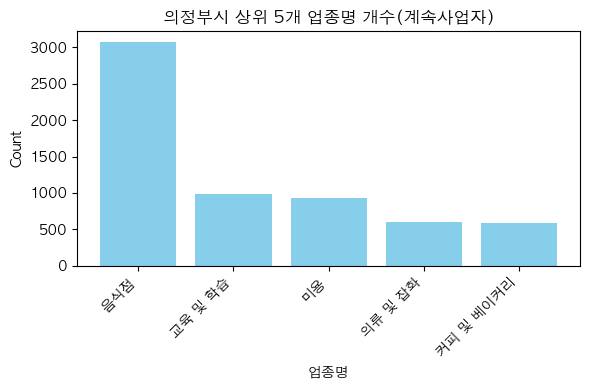

In [165]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 28 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 포천시
음식점          1966
편의점/슈퍼/마트     354
미용            273
식음료품          266
자동차 관련 업종     257
Name: 업종명, dtype: int64


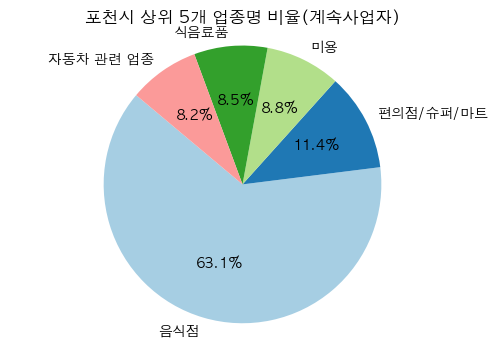

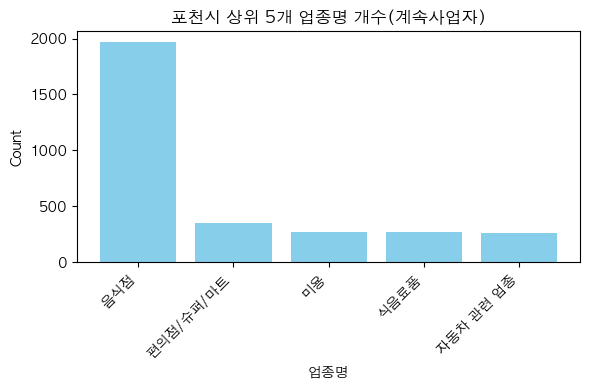

In [166]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 29 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 하남시
음식점          2013
교육 및 학습       907
커피 및 베이커리     489
미용            473
피부 및 헬스       377
Name: 업종명, dtype: int64


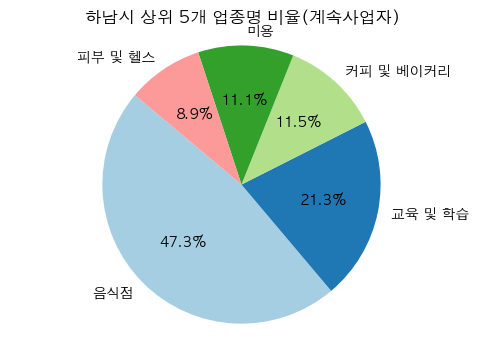

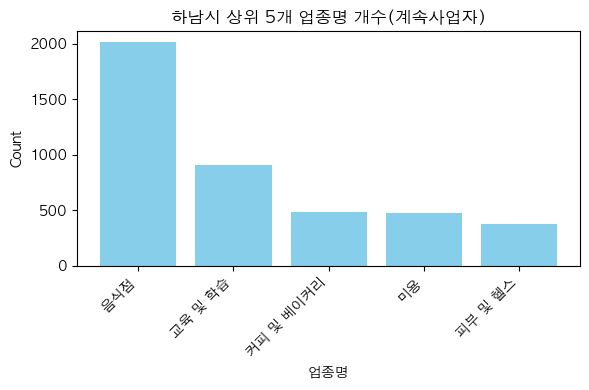

In [167]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 30 # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

### 휴업상태가 "휴업"인 데이터들만 모아 df3에 저장

In [129]:
# '휴폐업상태' 열의 각 고유 값들의 빈도수를 확인
value_counts = df1['휴폐업상태'].value_counts()

# 빈도수를 출력
print(value_counts)

계속사업자    403391
폐업자       15191
휴업자         168
Name: 휴폐업상태, dtype: int64


In [130]:
# '휴폐업상태'가 '휴업'인 데이터만 필터링하여 df3에 저장
df3 = df1[df1['휴폐업상태'] == '휴업자']

# df3 확인
print(df3.shape)
df3.head()

(168, 7)


시군명           상호명         업종명  업종코드 휴폐업상태 폐업일자   데이터기준일자
23083  광명시        선진특수렉카   자동차 관련 업종  6502   휴업자  NaN  20240331
24200  과천시          소연커피         음식점  2301   휴업자  NaN  20240331
24823  과천시         삼성씨엔이       가전/통신  3101   휴업자  NaN  20240331
25041  과천시        온유필라테스  기타레저,스포츠용품  8105   휴업자  NaN  20240331
25492  광명시  빠레뜨예술공간미술교습소     교육 및 학습  1015   휴업자  NaN  20240331

In [131]:
df3["시군명"].value_counts()

용인시    46
김포시    40
평택시    34
성남시    26
광명시    14
과천시     4
의왕시     4
Name: 시군명, dtype: int64

In [132]:
# 시군명을 리스트로 저장
city_county_names = df3['시군명'].unique().tolist()

# 특정 시군명의 상위 5개 업종명을 계산하는 함수
def get_top_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    top_5_industry_count = industry_count.nlargest(5)
    return top_5_industry_count

In [ ]:
import matplotlib.pyplot as plt

def plot_top_5_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_10_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(6, 4))
    plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 상위 5개 업종명 비율(계속사업자)")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(6, 4))
    plt.bar(top_10_industries.index, top_10_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 상위 5개 업종명 개수(계속사업자)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()